# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Computing-auto-covariance-function" data-toc-modified-id="Computing-auto-covariance-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Computing auto-covariance function</a></div><div class="lev2 toc-item"><a href="#Plots" data-toc-modified-id="Plots-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plots</a></div><div class="lev1 toc-item"><a href="#Fitting-Auto-covariance-function" data-toc-modified-id="Fitting-Auto-covariance-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting Auto-covariance function</a></div><div class="lev2 toc-item"><a href="#Specifying-kernel" data-toc-modified-id="Specifying-kernel-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Specifying kernel</a></div><div class="lev2 toc-item"><a href="#Optimization-ACF" data-toc-modified-id="Optimization-ACF-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Optimization ACF</a></div><div class="lev1 toc-item"><a href="#Fitting-GP" data-toc-modified-id="Fitting-GP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fitting GP</a></div>

In [1]:
import PyPlot; plt=PyPlot
using LaTeXStrings
plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

# Computing auto-covariance function

In [2]:
using TimeSeries

In [3]:
using DataFrames

In [4]:
station_data = readtable("data2015/725450.14990.processed.2015.2015.csv", 
    header=false,
    names=[:year, :month, :day, :hour, :min, :seconds, :temp])
station_data = station_data[!isnan(station_data[:temp]),:]    
station_ts = DateTime[DateTime(r[:year], r[:month], r[:day], r[:hour], r[:min], r[:seconds]) for r in eachrow(station_data)]
station_ts[1:10]

10-element Array{DateTime,1}:
 2015-01-01T00:52:00
 2015-01-01T01:52:00
 2015-01-01T02:52:00
 2015-01-01T03:52:00
 2015-01-01T04:52:00
 2015-01-01T05:52:00
 2015-01-01T06:52:00
 2015-01-01T07:52:00
 2015-01-01T08:52:00
 2015-01-01T09:52:00

In [5]:
# function ACF(times, values, bins)
#     npairs = zeros(Int, length(bins))
#     sqdiff_accum = zeros(Float64, length(bins))
#     n = length(times)
#     for (i, t1) in enumerate(times)
#         ibin = 1
#         for j in i:n
#             Δt = times[j] - t1
#             while Δt>bins[ibin]
#                 ibin += 1
#             end
#             npairs[ibin] += 1
#             sqdiff_accum[ibin] += (values[j]*values[i])
#         end
#     end
#     return sqdiff_accum ./ npairs
# end 
function variogram(times, values, bins)
    npairs = zeros(Int, length(bins))
    sqdiff_accum = zeros(Float64, length(bins))
    n = length(times)
    for (i, t1) in enumerate(times)
        ibin = 1
        for j in i:n
            Δt = times[j] - t1
            while Δt>bins[ibin]
                ibin += 1
            end
            npairs[ibin] += 1
            sqdiff_accum[ibin] += (values[j]-values[i])^2
        end
    end
    return sqdiff_accum ./ (npairs.*2)
end
function ACF(times, values, bins)
    return var(values) .- variogram(times, values, bins)
end

ACF (generic function with 1 method)

In [6]:
_bins = collect(Dates.Hour(0):Dates.Hour(1):Dates.Hour(400*24))
station_ACF = ACF(station_ts, station_data[:temp].-mean(station_data[:temp]), _bins)
station_variog = variogram(station_ts, station_data[:temp].-mean(station_data[:temp]), _bins)

9601-element Array{Float64,1}:
   0.0     
   0.555185
   1.6863  
   3.28764 
   5.23111 
   7.30622 
   9.5084  
  11.6131  
  13.4964  
  15.1637  
  16.5549  
  17.7271  
  18.4046  
   ⋮       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       
 NaN       

## Plots

In [7]:
bins_hours = convert(Vector{Float64}, _bins);
bins_days = bins_hours/24;

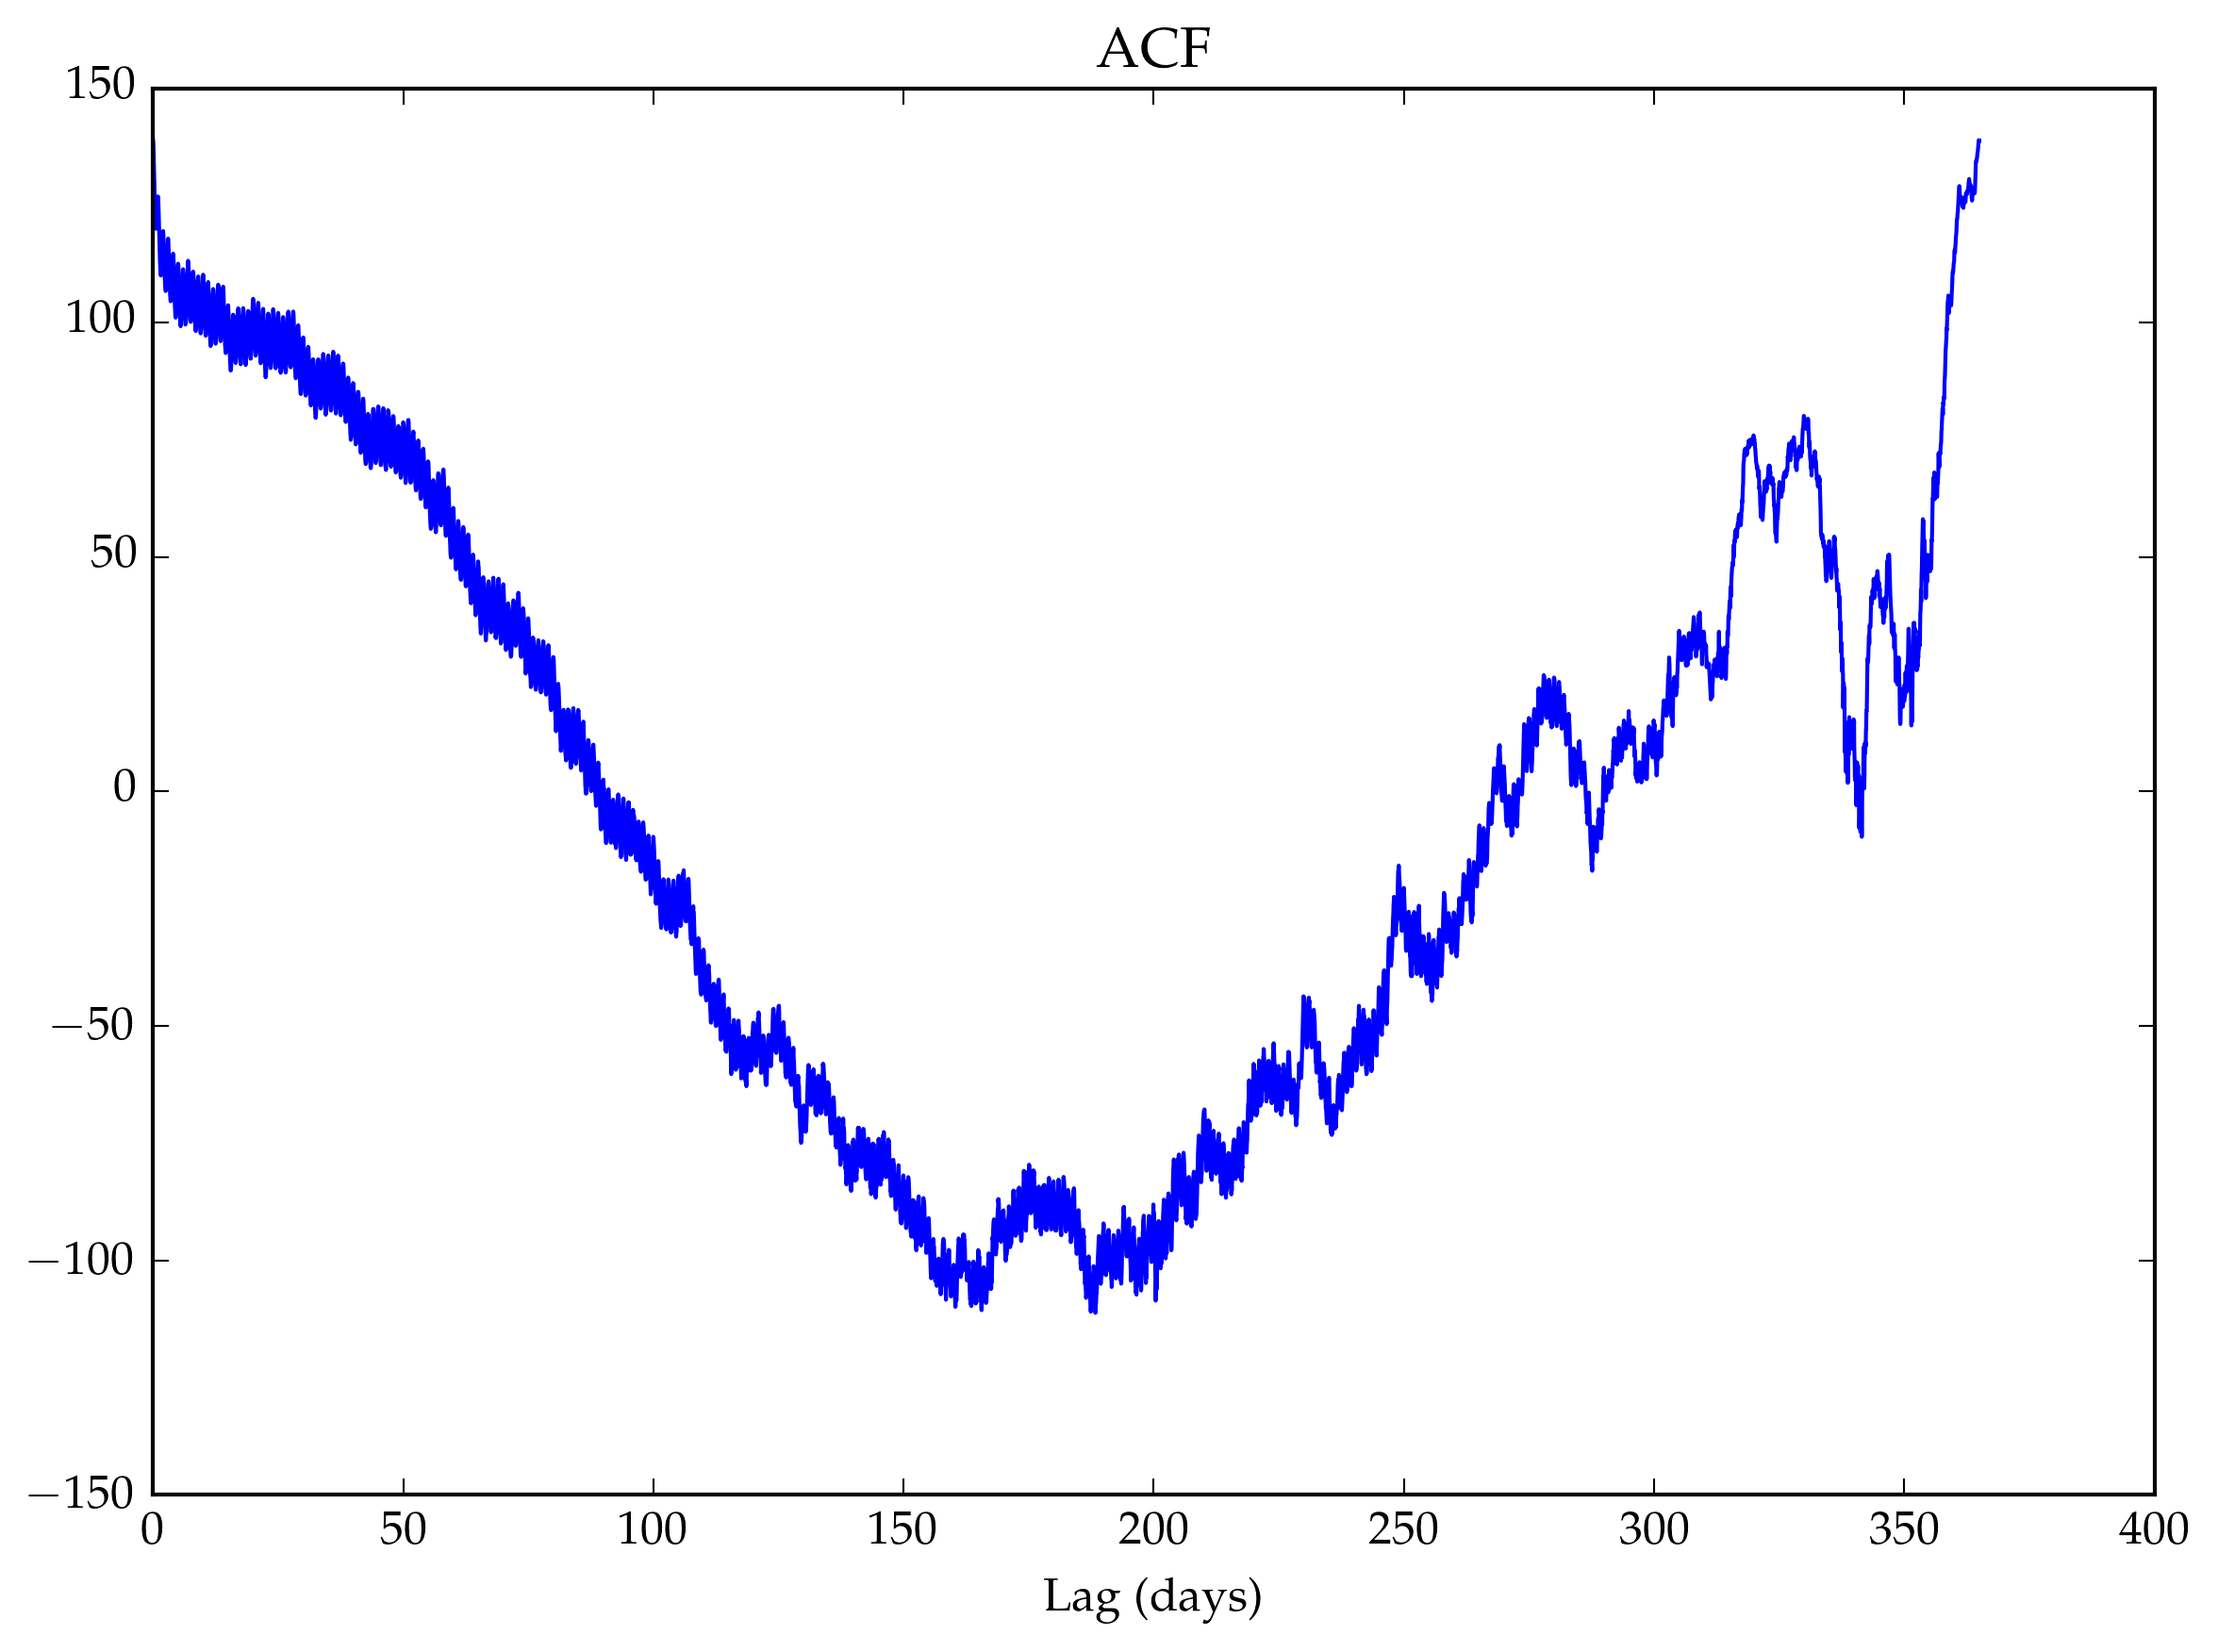

/Users/imolk/bin/venv_jupyter/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [8]:
plt.plot(bins_days, station_ACF)
plt.xlabel("Lag (days)")
plt.title("ACF")
;

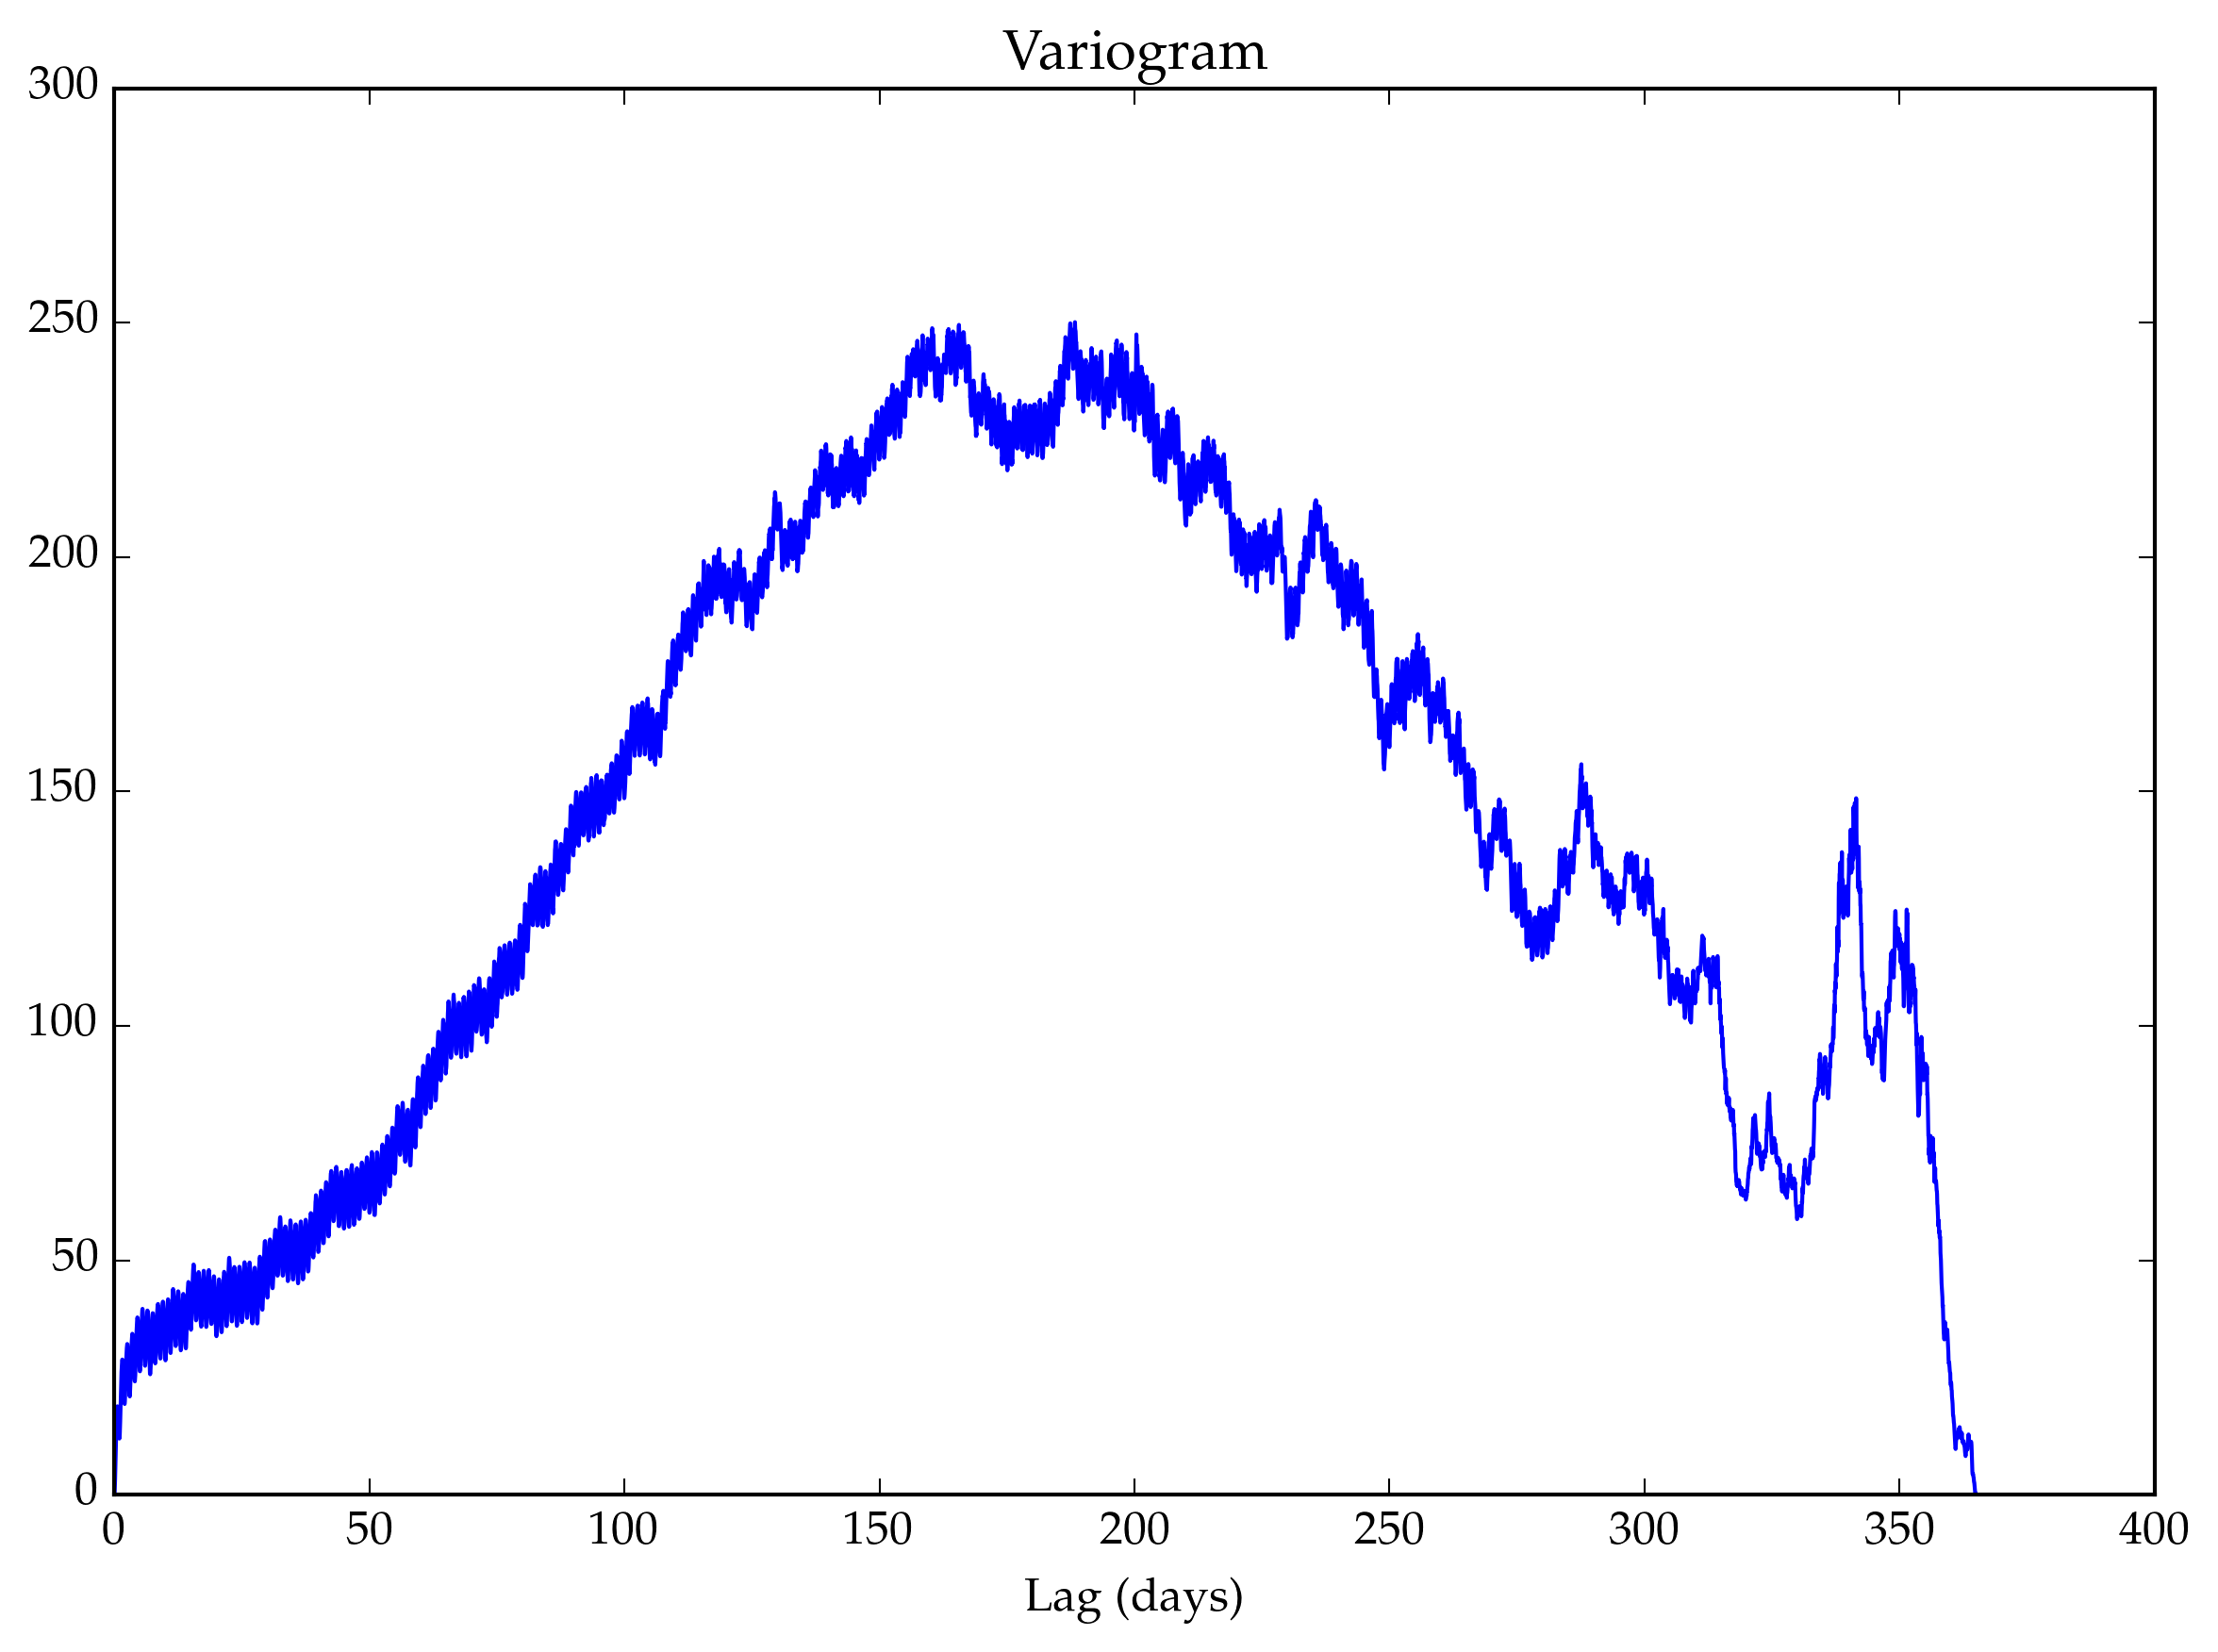

In [9]:
plt.plot(bins_days, station_variog)
plt.title("Variogram")
plt.xlabel("Lag (days)")
;

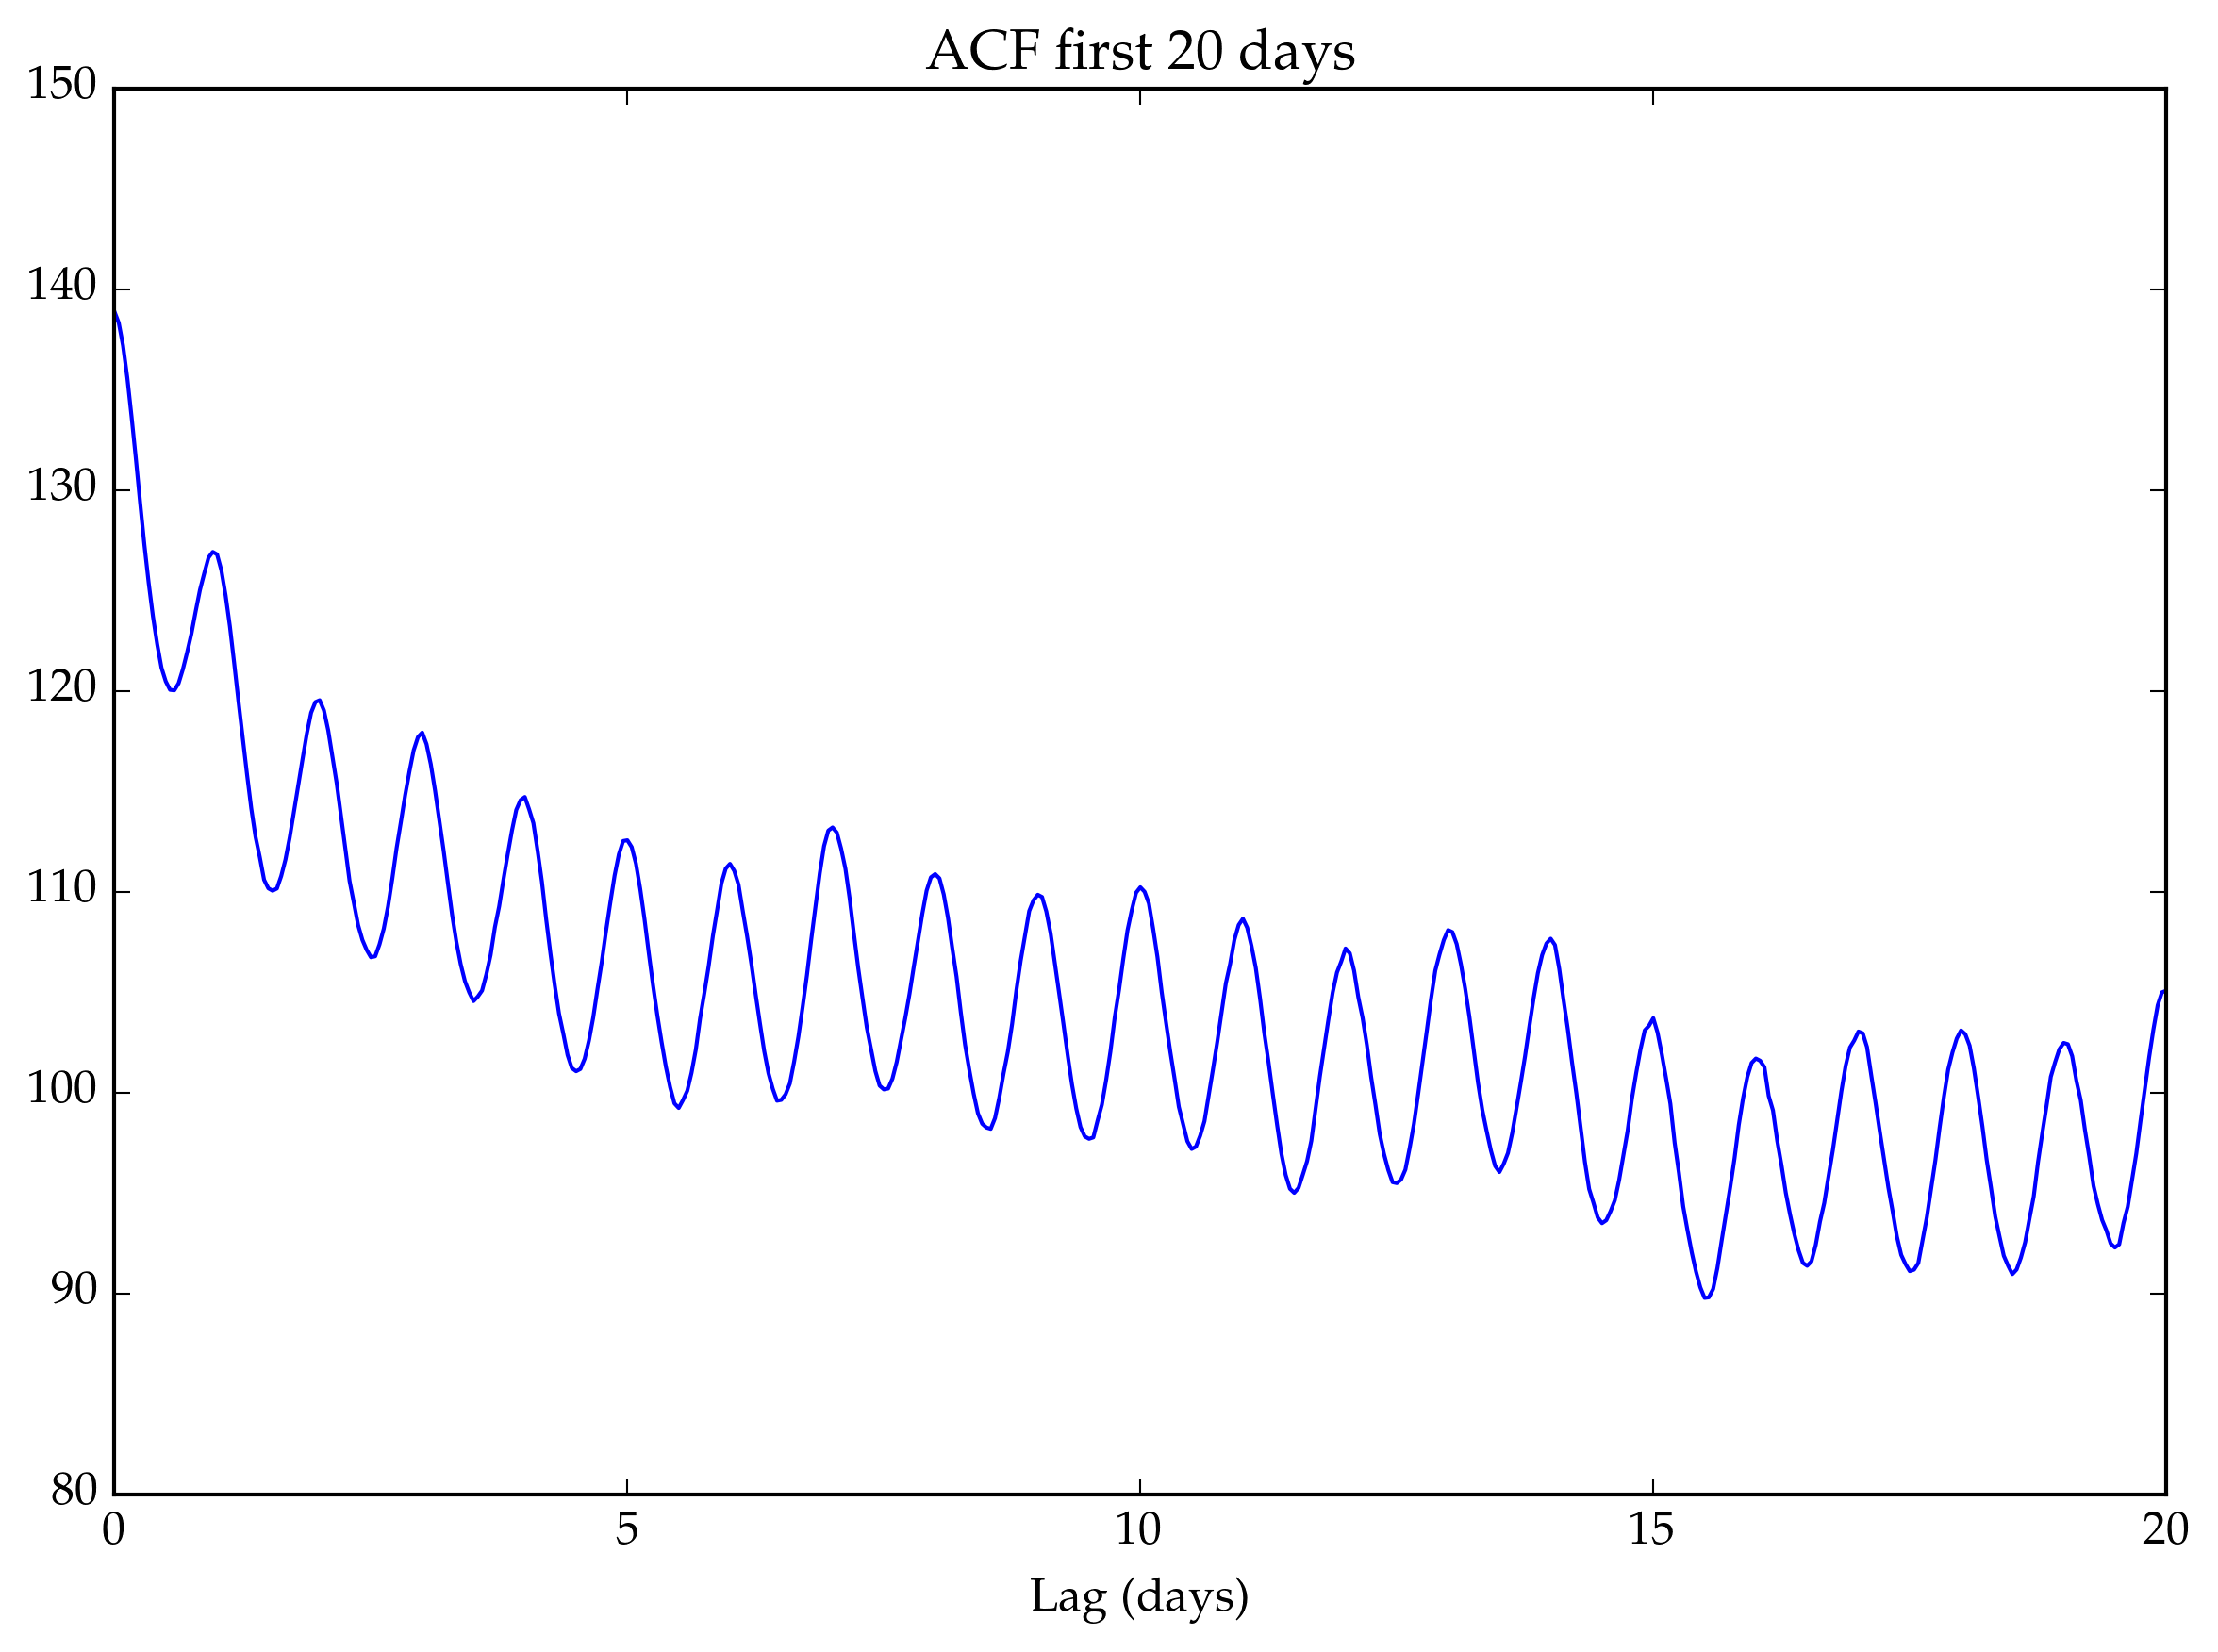

In [10]:
plt.plot(bins_days, station_ACF)
plt.xlim(0,20)
plt.ylim(80,150)
plt.title("ACF first 20 days")
plt.xlabel("Lag (days)")
;

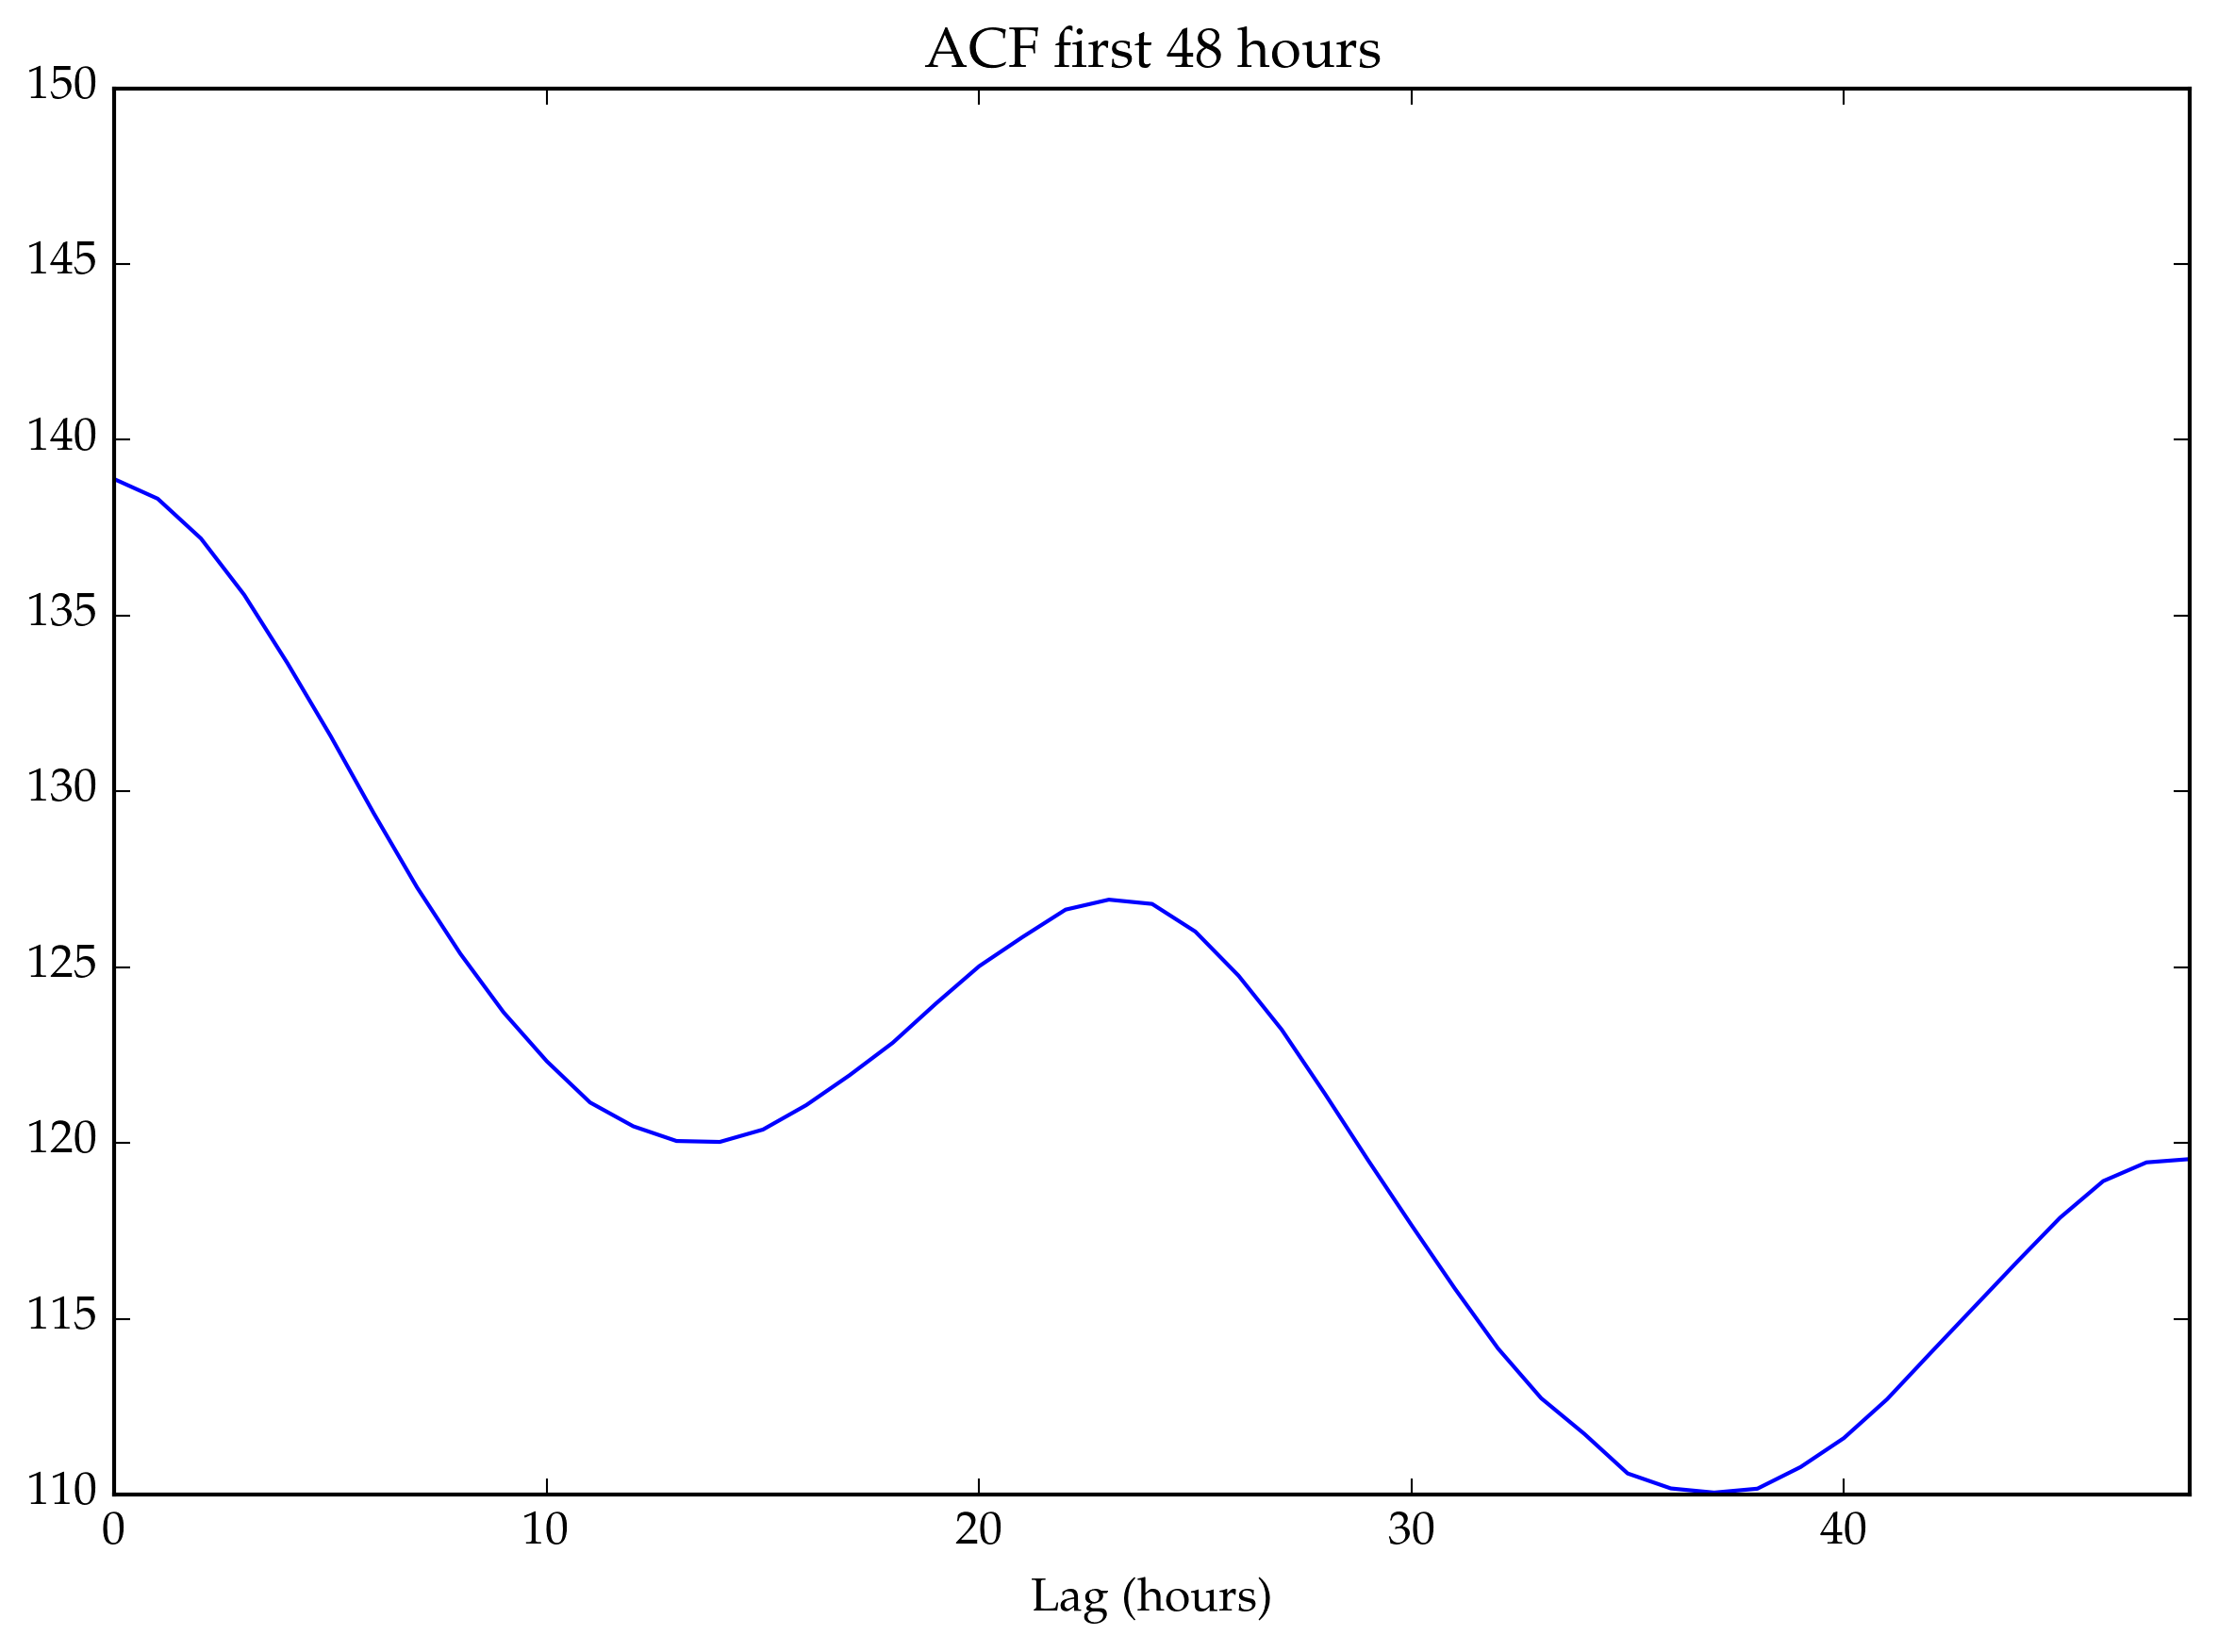

In [11]:
plt.plot(bins_hours, station_ACF)
plt.xlim(0,48)
plt.ylim(110,150)
plt.title("ACF first 48 hours")
plt.xlabel("Lag (hours)")
;

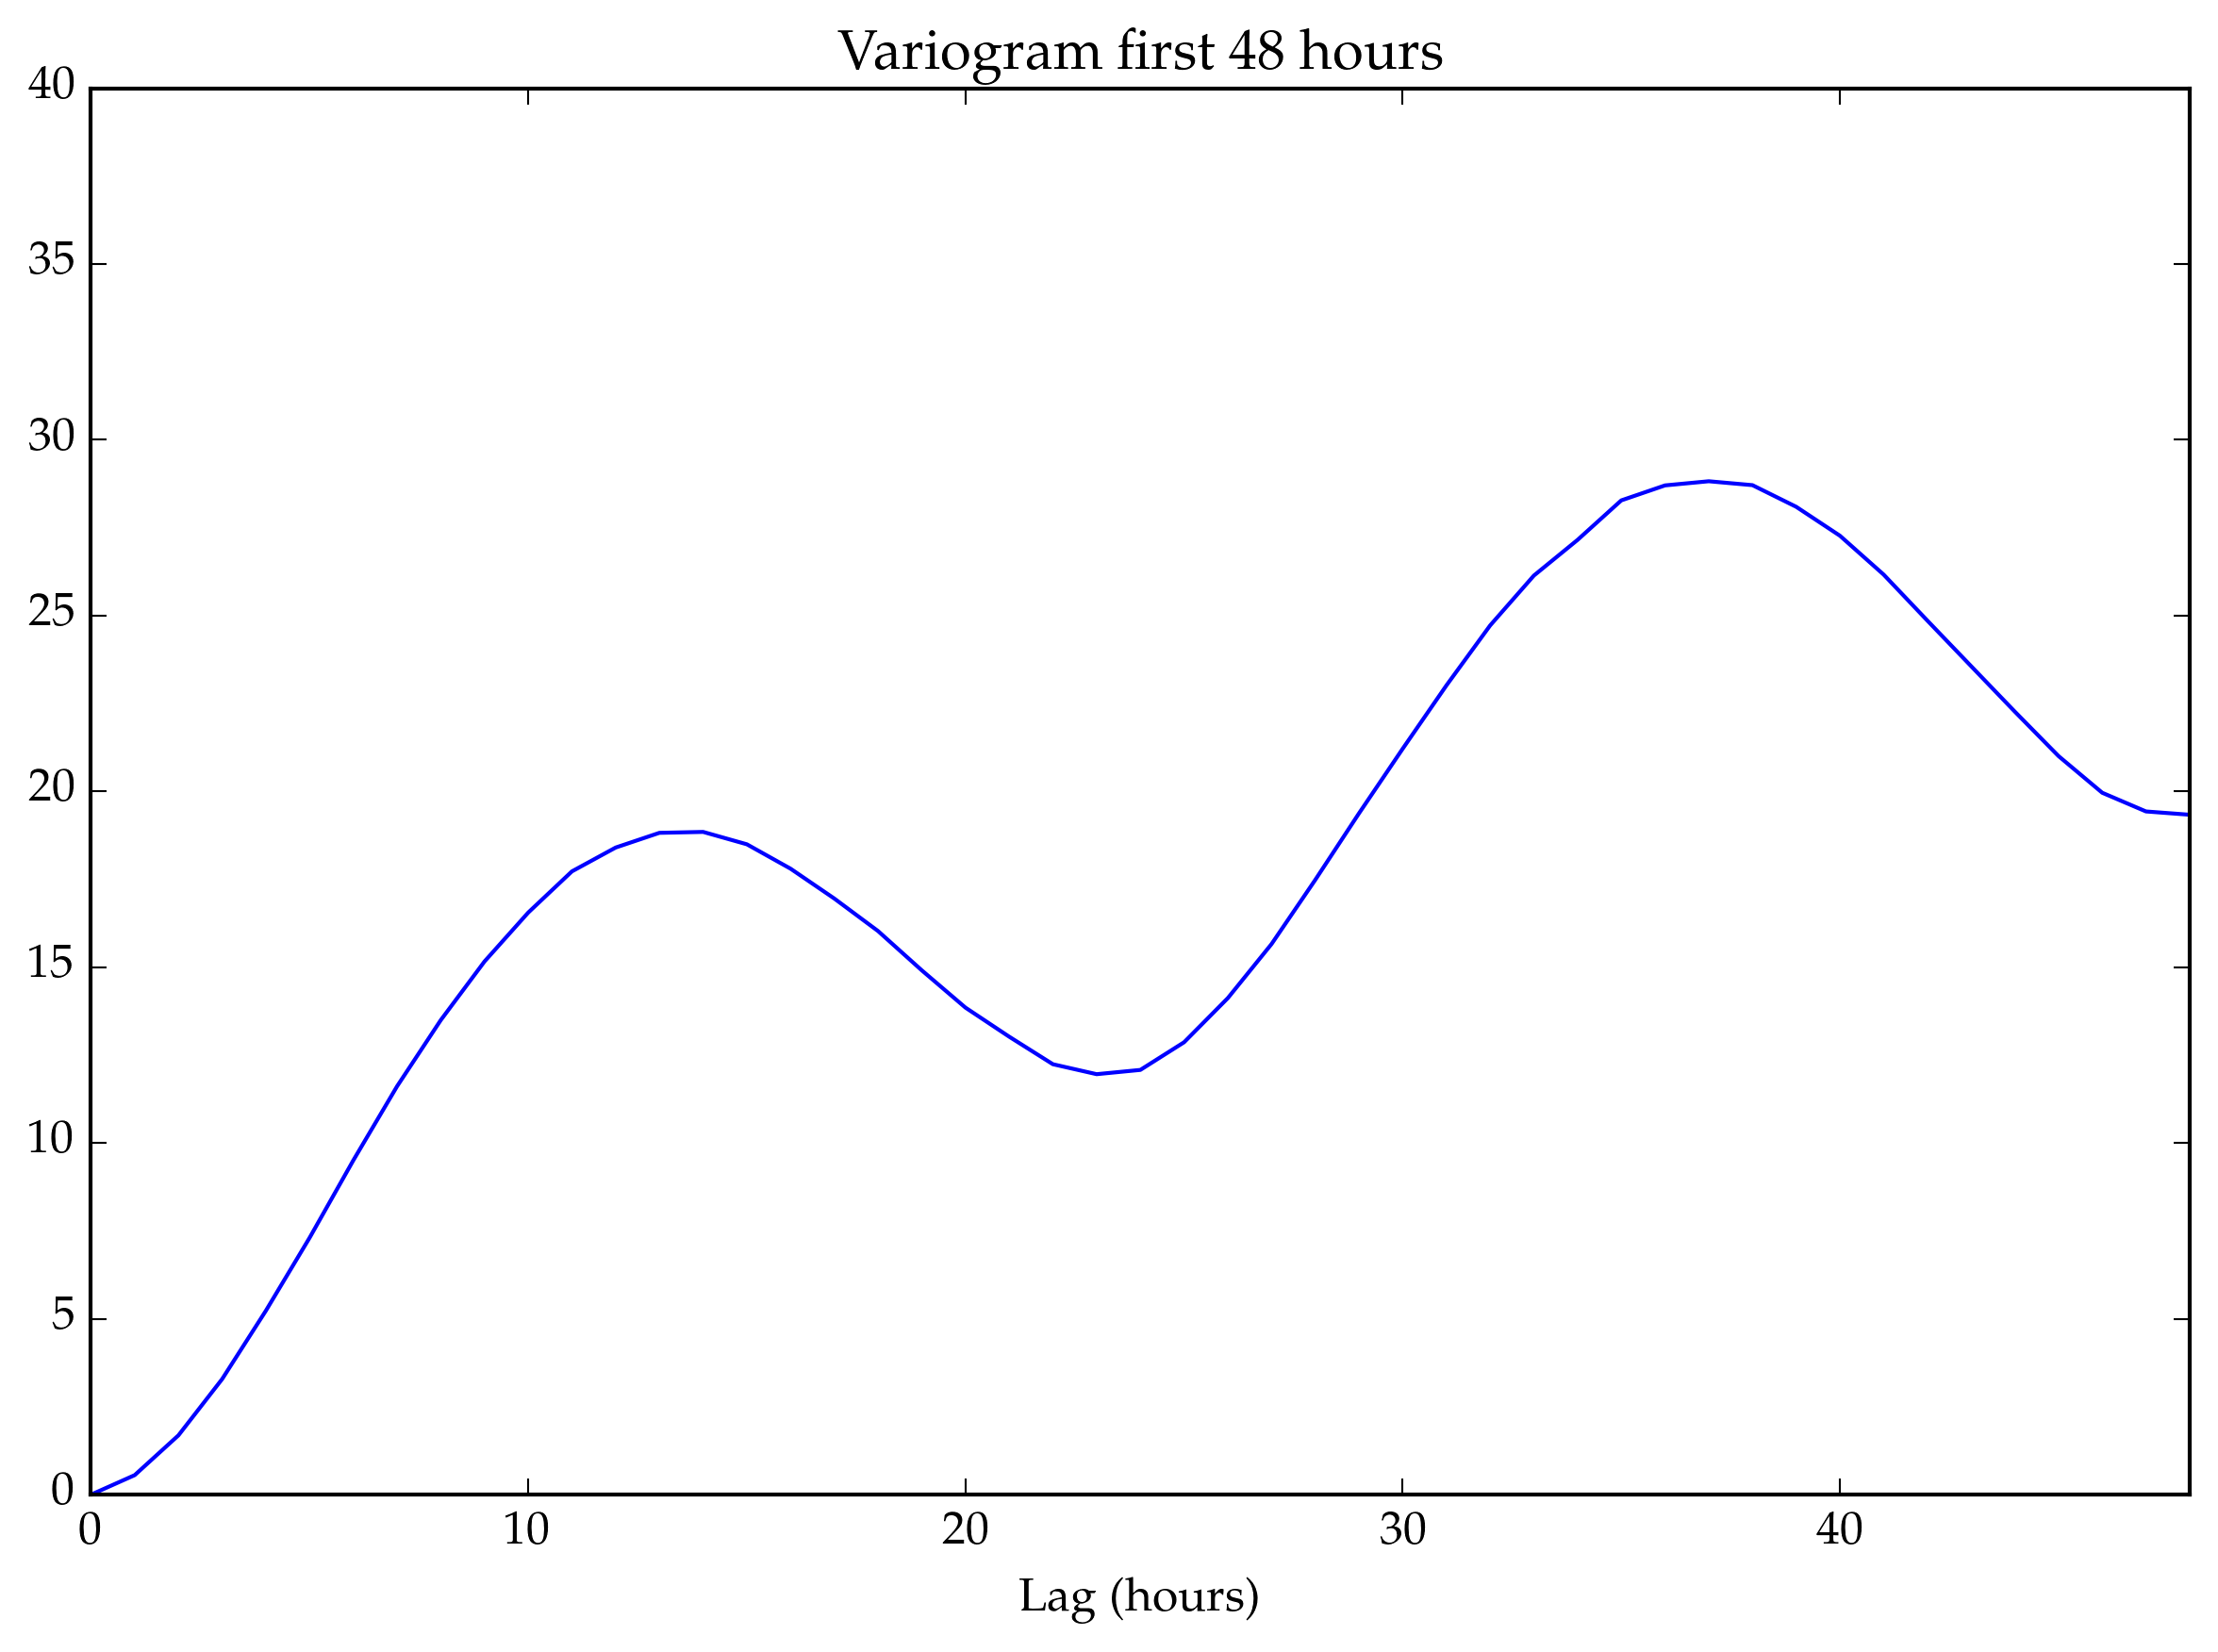

In [12]:
plt.plot(bins_hours, station_variog)
plt.xlim(0,48)
plt.ylim(0,40)
plt.title("Variogram first 48 hours")
plt.xlabel("Lag (hours)")
;

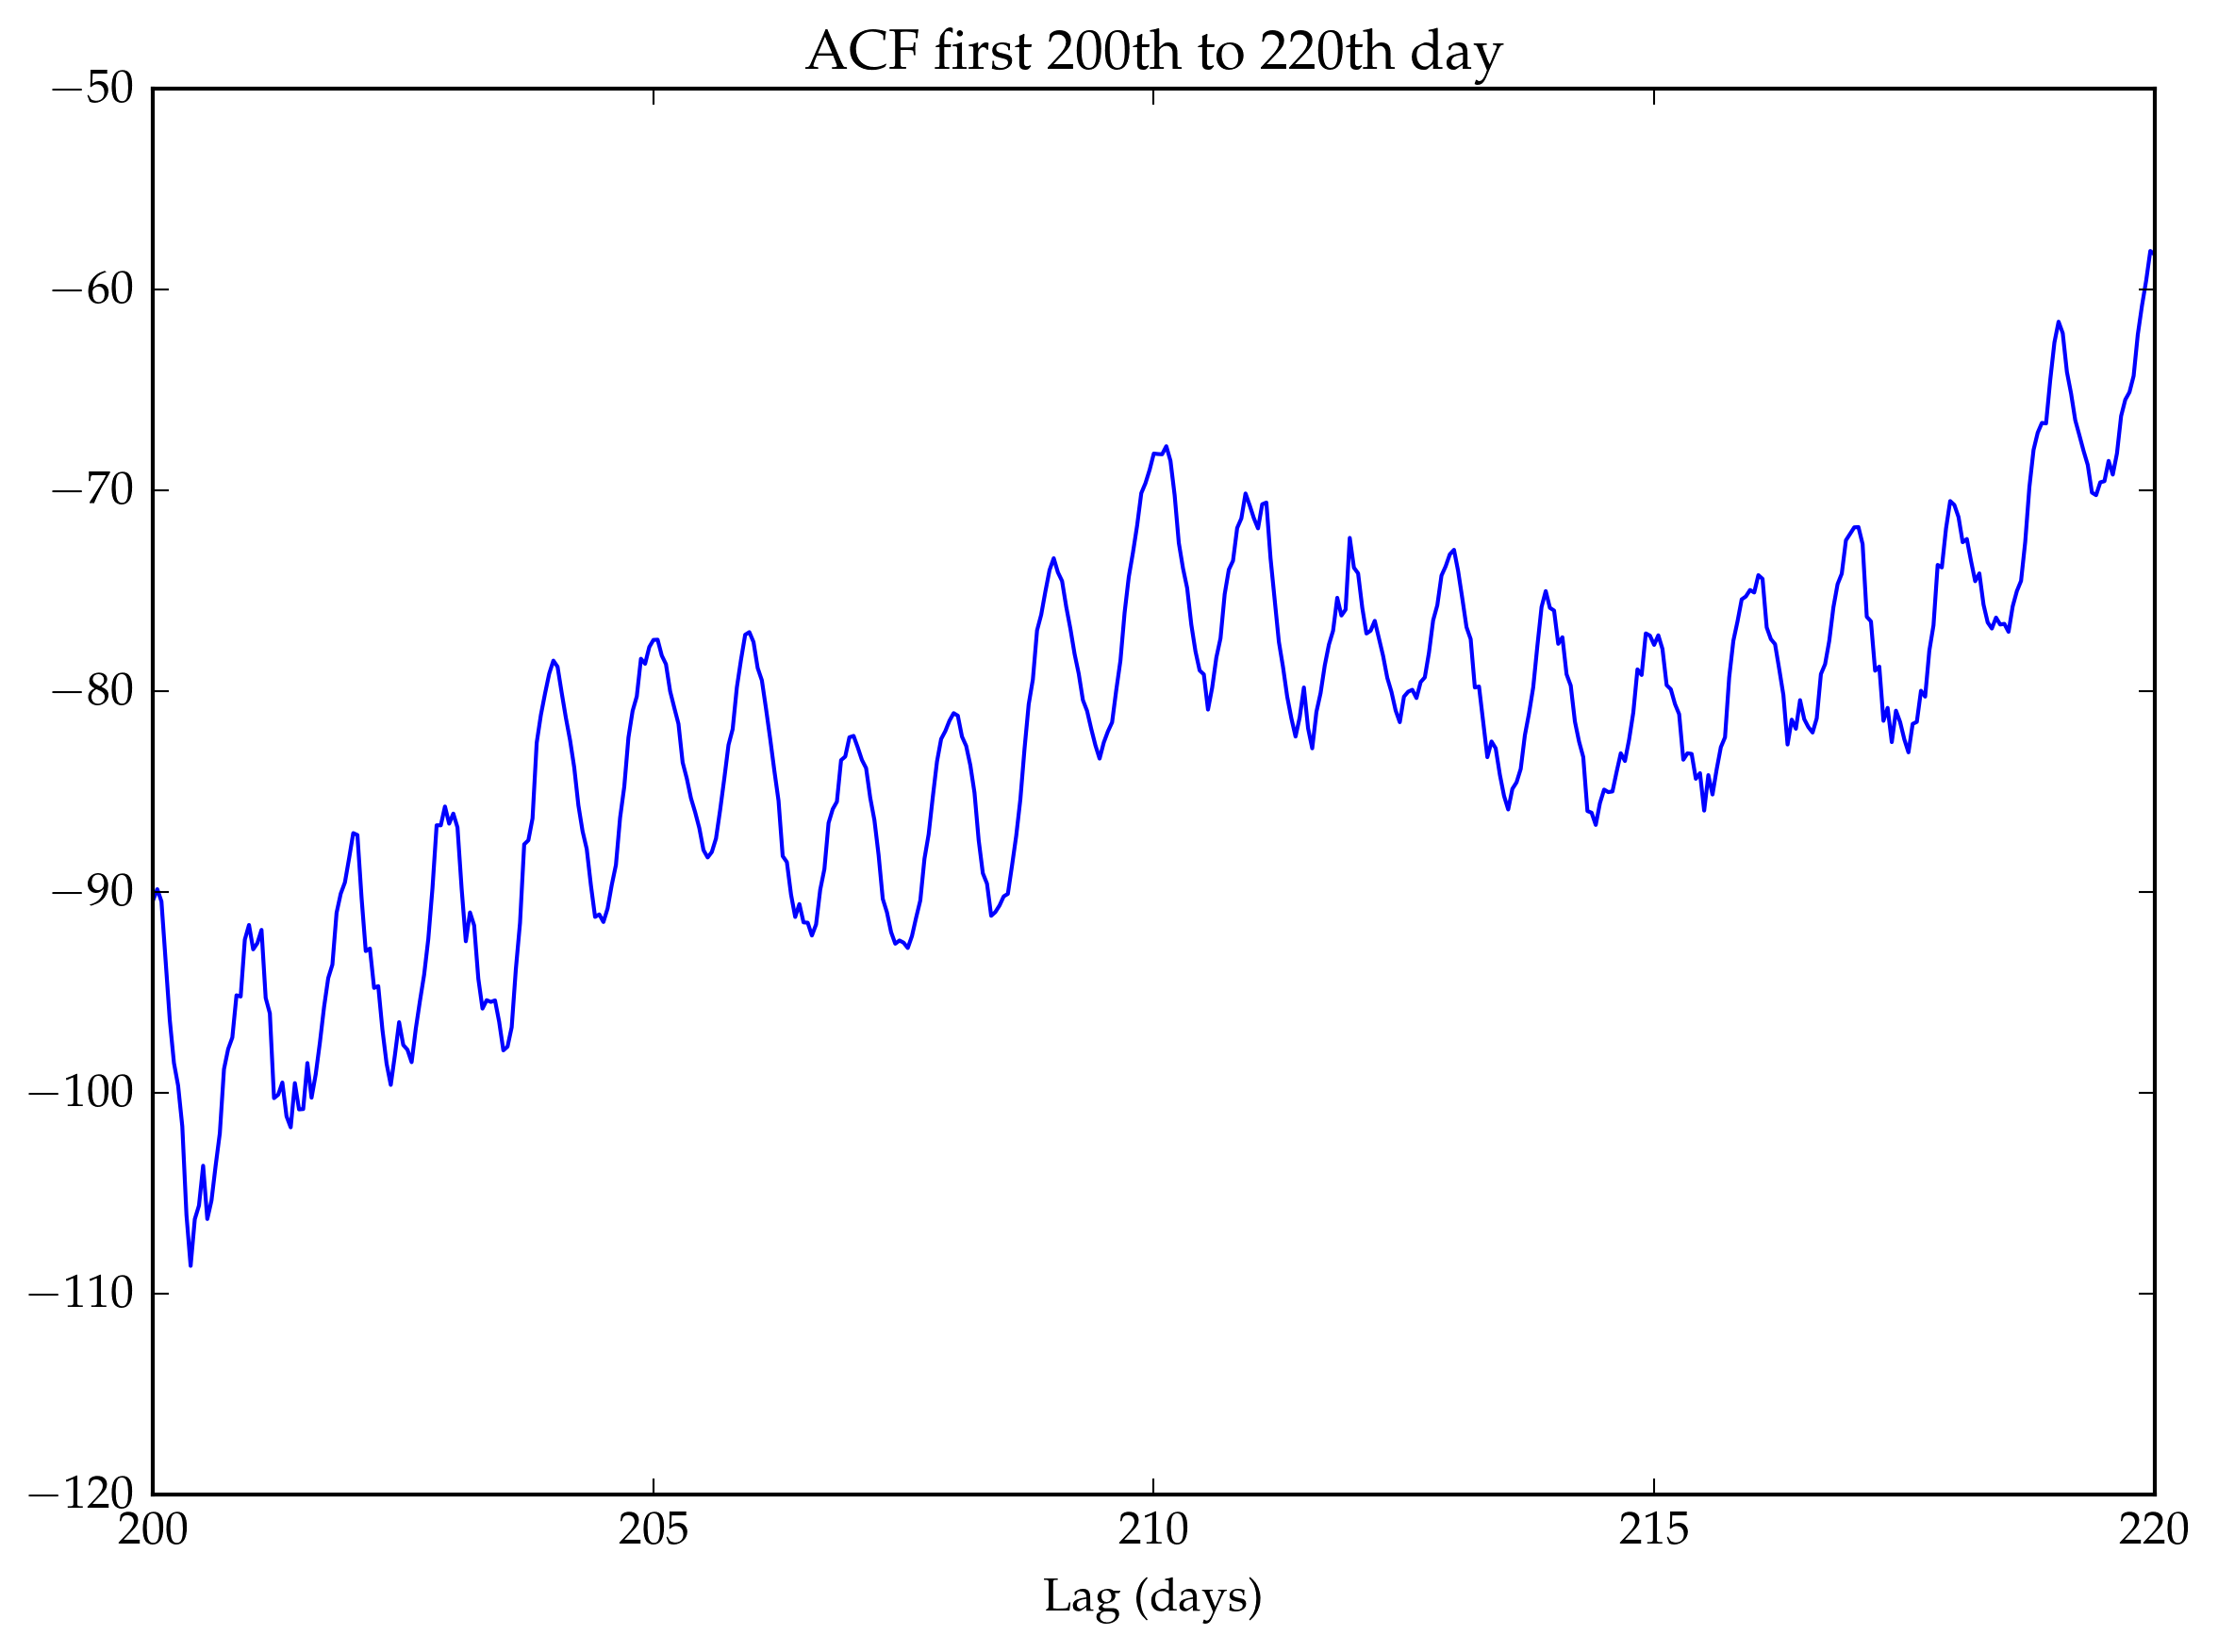

In [13]:
plt.plot(bins_days, station_ACF)
plt.xlim(200,220)
plt.ylim(-120,-50)
plt.title("ACF first 200th to 220th day")
plt.xlabel("Lag (days)")
;

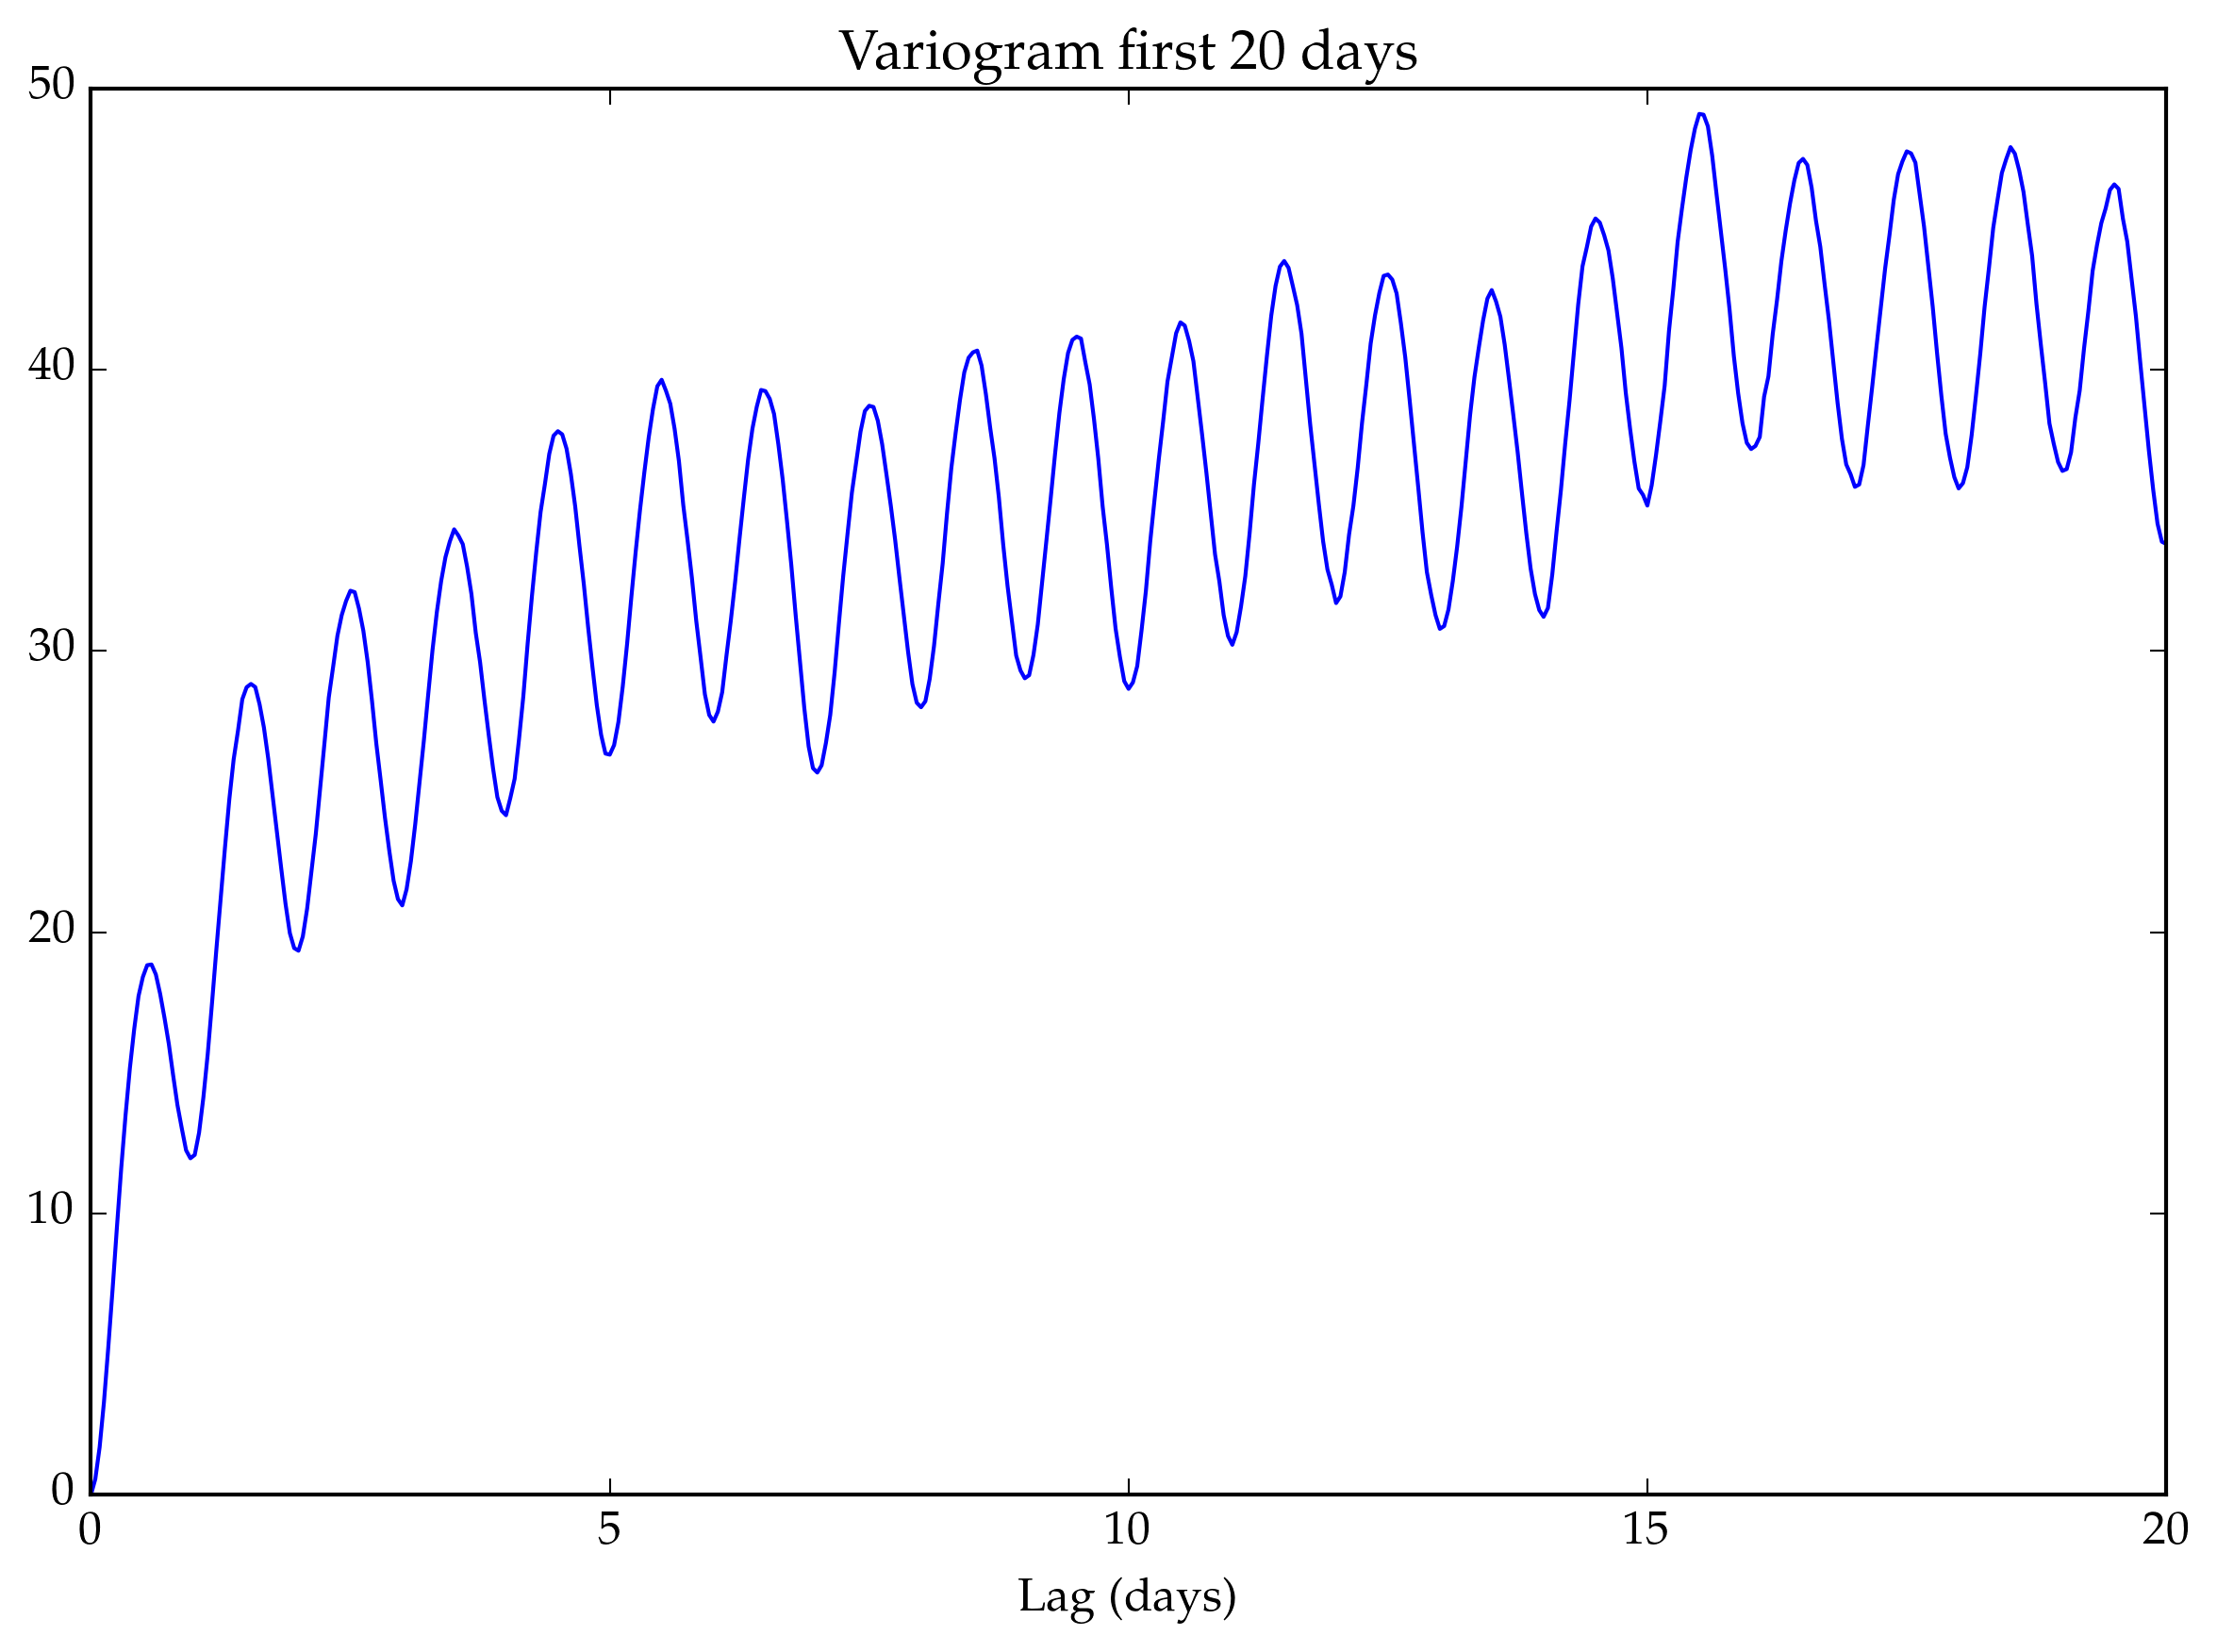

In [14]:
plt.plot(bins_days, station_variog)
plt.xlim(0,20)
plt.ylim(0,50)
plt.title("Variogram first 20 days")
plt.xlabel("Lag (days)")
;

# Fitting Auto-covariance function

In [15]:
import Gadfly
import GaussianProcesses
GP = GaussianProcesses;
import Optim

INFO: Precompiling module Gadfly.


## Specifying kernel

In [16]:
k1 = GP.Periodic(log(0.5), log(√(10.0)), log(24.0))
k2 = GP.SE(log(5.0*24), log(√40.0))
k3 = GP.SE(log(200.0*24), log(√80.0))
k4 = GP.SE(log(0.5*24), log(√10.0))
k5 = GP.Noise(log(√1.0))
k6 = GP.SE(log(20.0*24), 0.0)
_k=(k1+k2+k3+k4+k5)*k6

Type: GaussianProcesses.ProdKernel
  Type: GaussianProcesses.SumKernel
    Type: GaussianProcesses.Periodic, Params: [-0.693147,1.15129,3.17805]
    Type: GaussianProcesses.SEIso, Params: [4.78749,1.84444]
    Type: GaussianProcesses.SEIso, Params: [8.47637,2.19101]
    Type: GaussianProcesses.SEIso, Params: [2.48491,1.15129]
    Type: GaussianProcesses.Noise, Params: [0.0]
  Type: GaussianProcesses.SEIso, Params: [6.17379,0.0]


In [17]:
(k1+k2)+k3

Type: GaussianProcesses.SumKernel
  Type: GaussianProcesses.Periodic, Params: [-0.693147,1.15129,3.17805]
  Type: GaussianProcesses.SEIso, Params: [4.78749,1.84444]
  Type: GaussianProcesses.SEIso, Params: [8.47637,2.19101]


In [18]:
# put the tedious stuff in a function
function cov_to_0(k::GP.Kernel, x::AbstractVector)
    return vec(GP.cov(k, collect(reshape(x, (1,length(x)))), zeros(Float64, 1,1)))
end

cov_to_0 (generic function with 1 method)

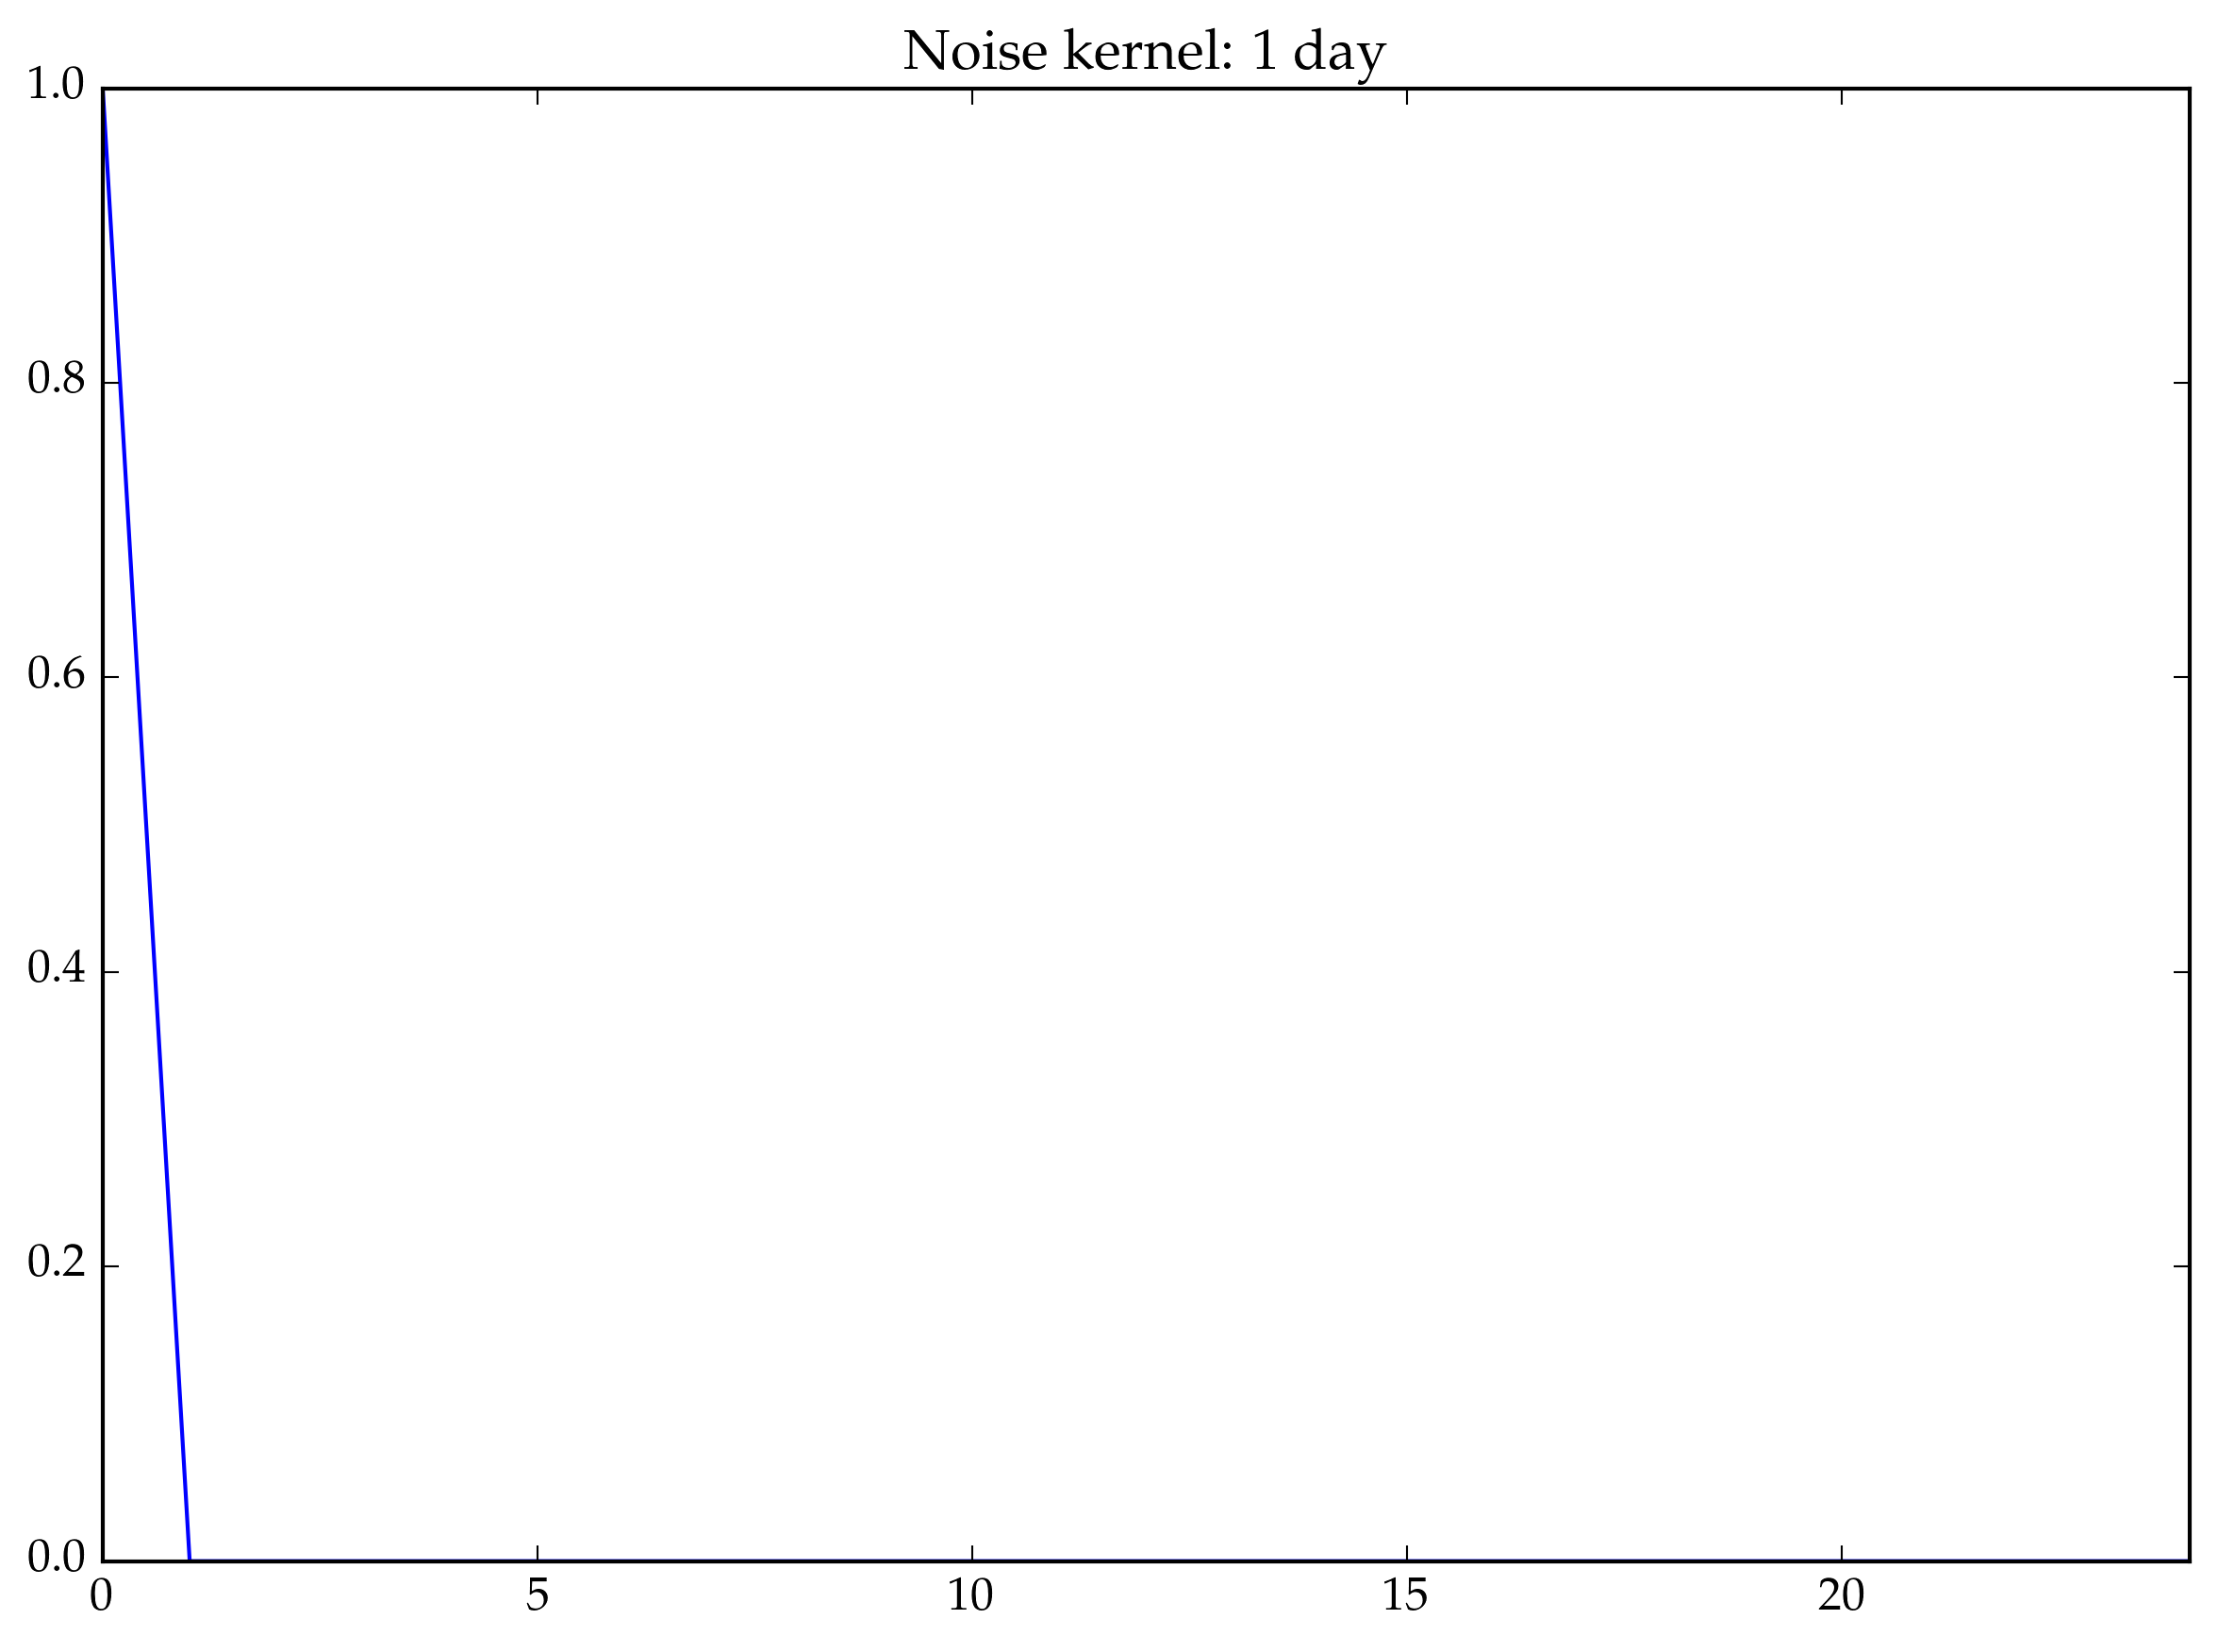

In [19]:
_x = 0:24.0
plt.plot(_x, cov_to_0(k5, _x))
plt.xlim(0,24)
plt.title("Noise kernel: 1 day")
;

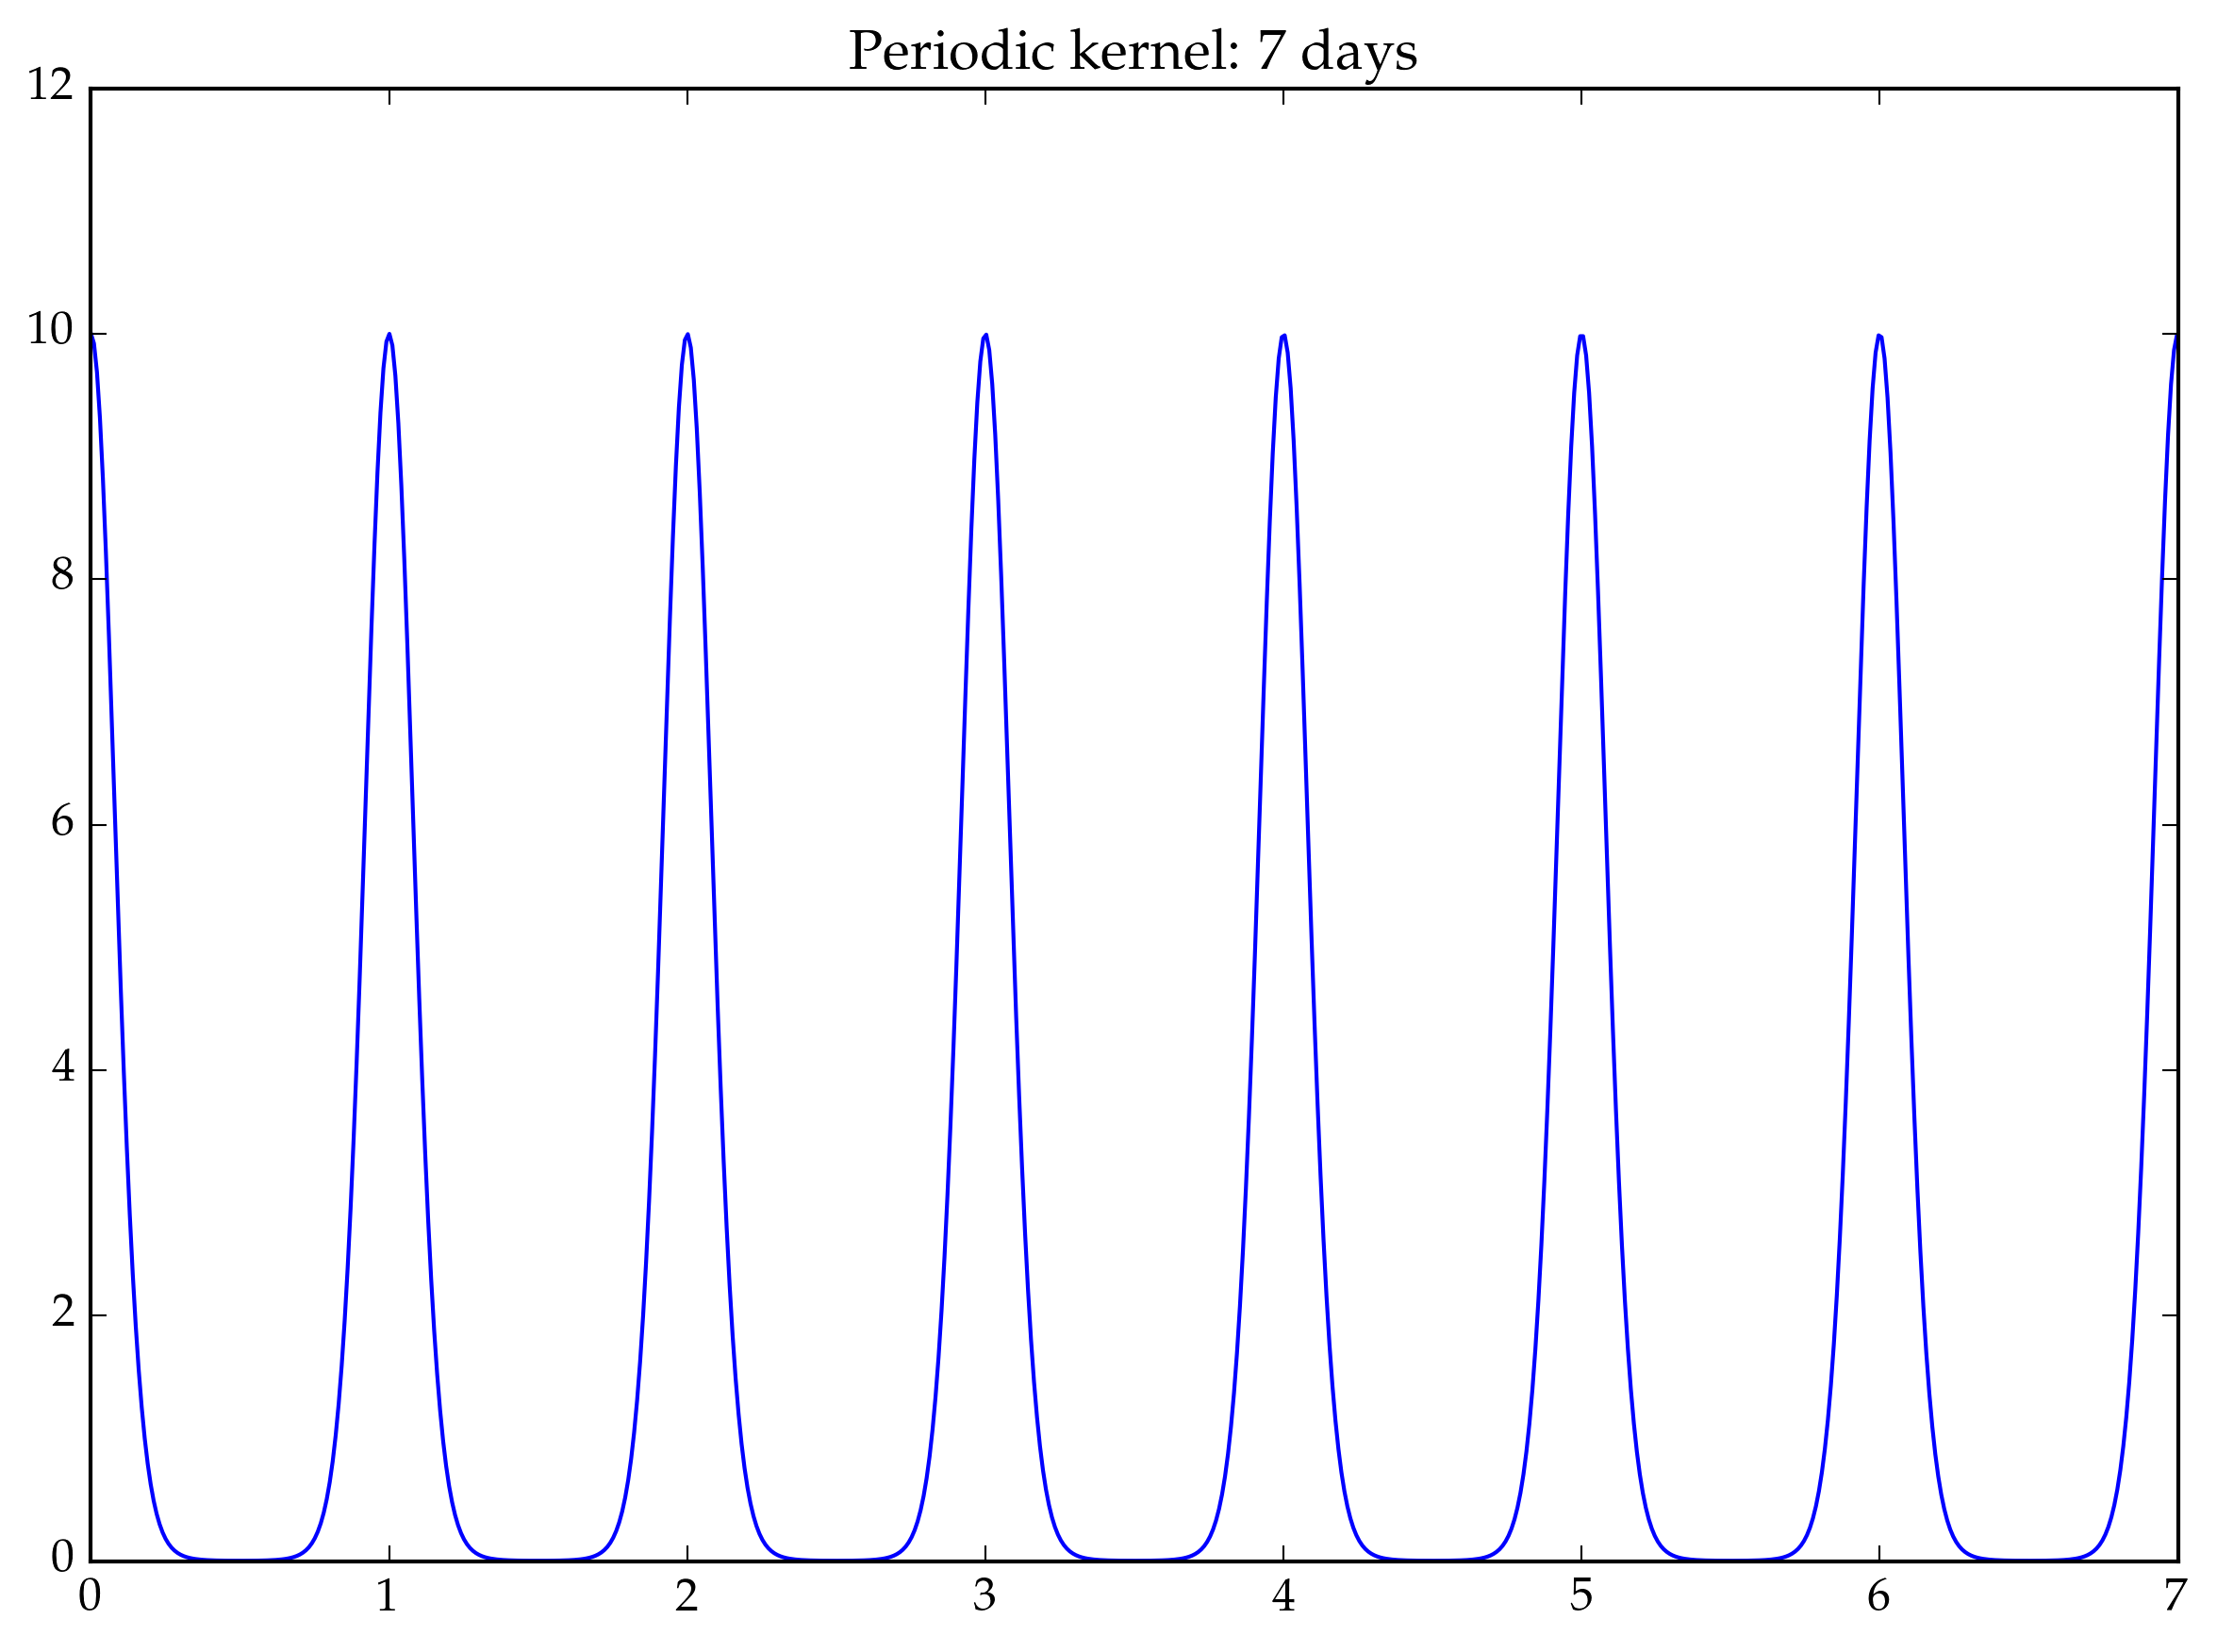

In [20]:
_x = linspace(0,24*10,1000)
plt.plot(_x/24, cov_to_0(k1, _x))
plt.xlim(0,7)
plt.title("Periodic kernel: 7 days")
;

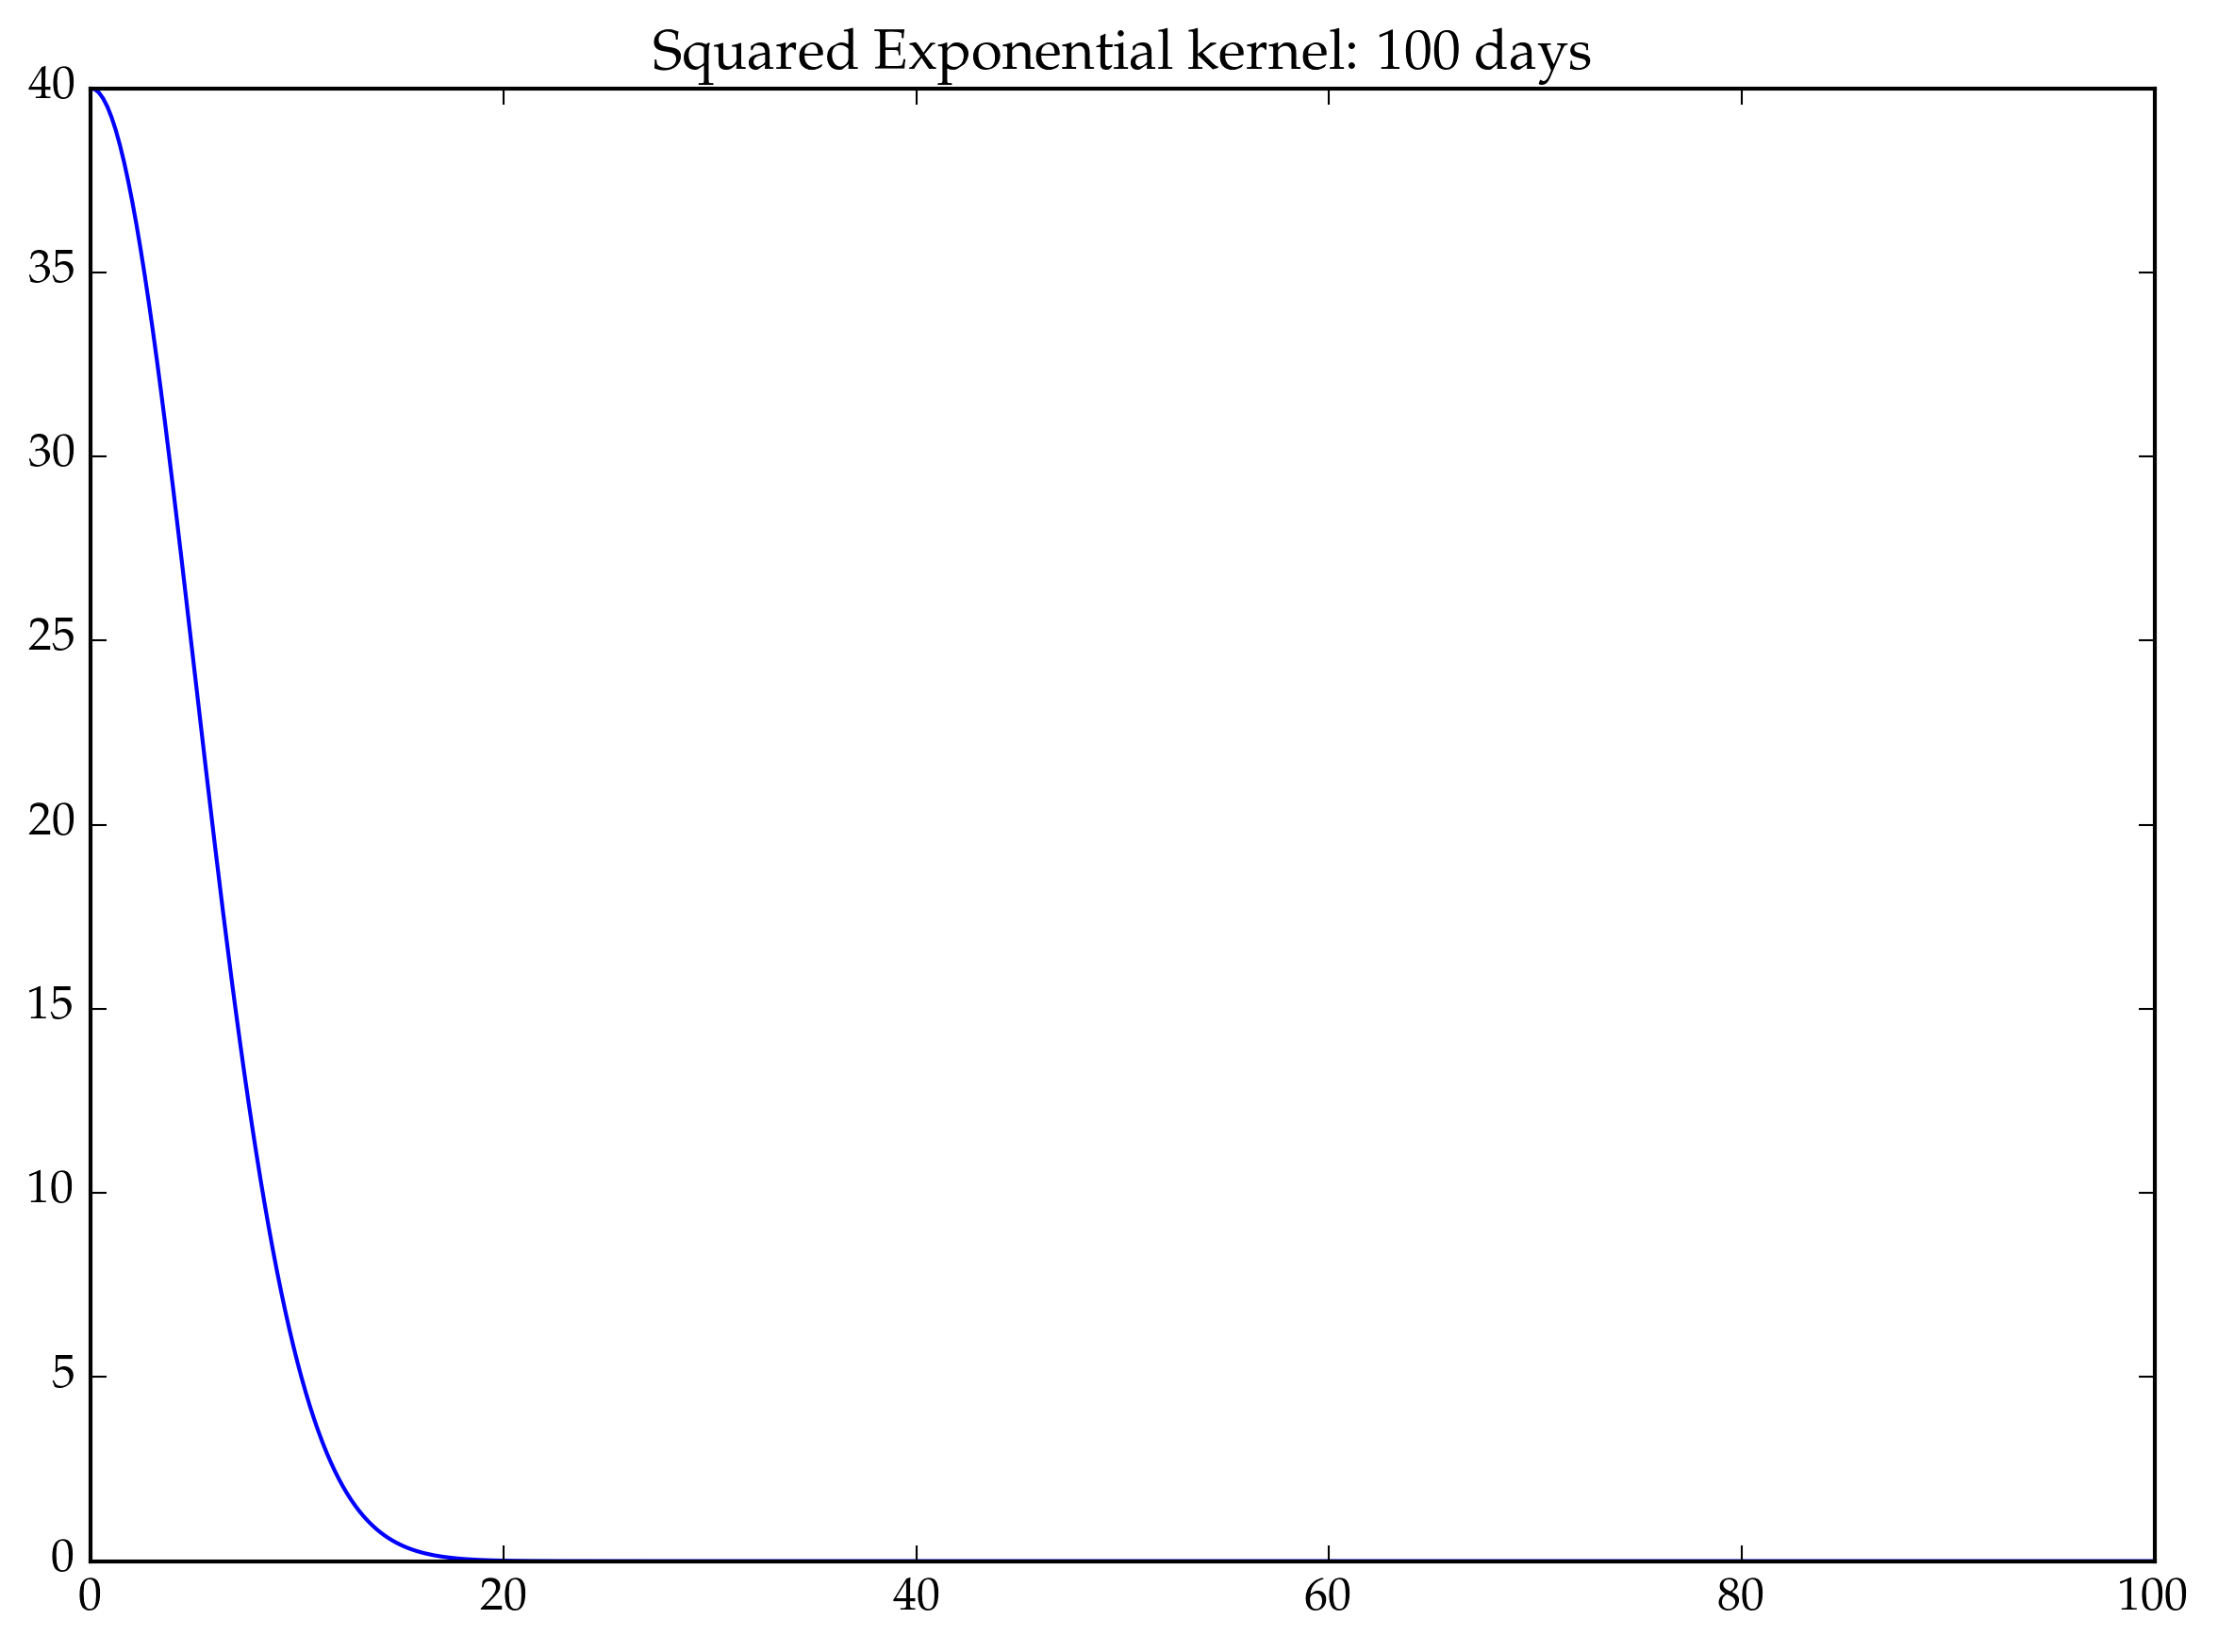

In [21]:
_x = linspace(0,24*200,1000)
plt.plot(_x/24, cov_to_0(k2, _x))
plt.xlim(0,100)
plt.title("Squared Exponential kernel: 100 days")
;

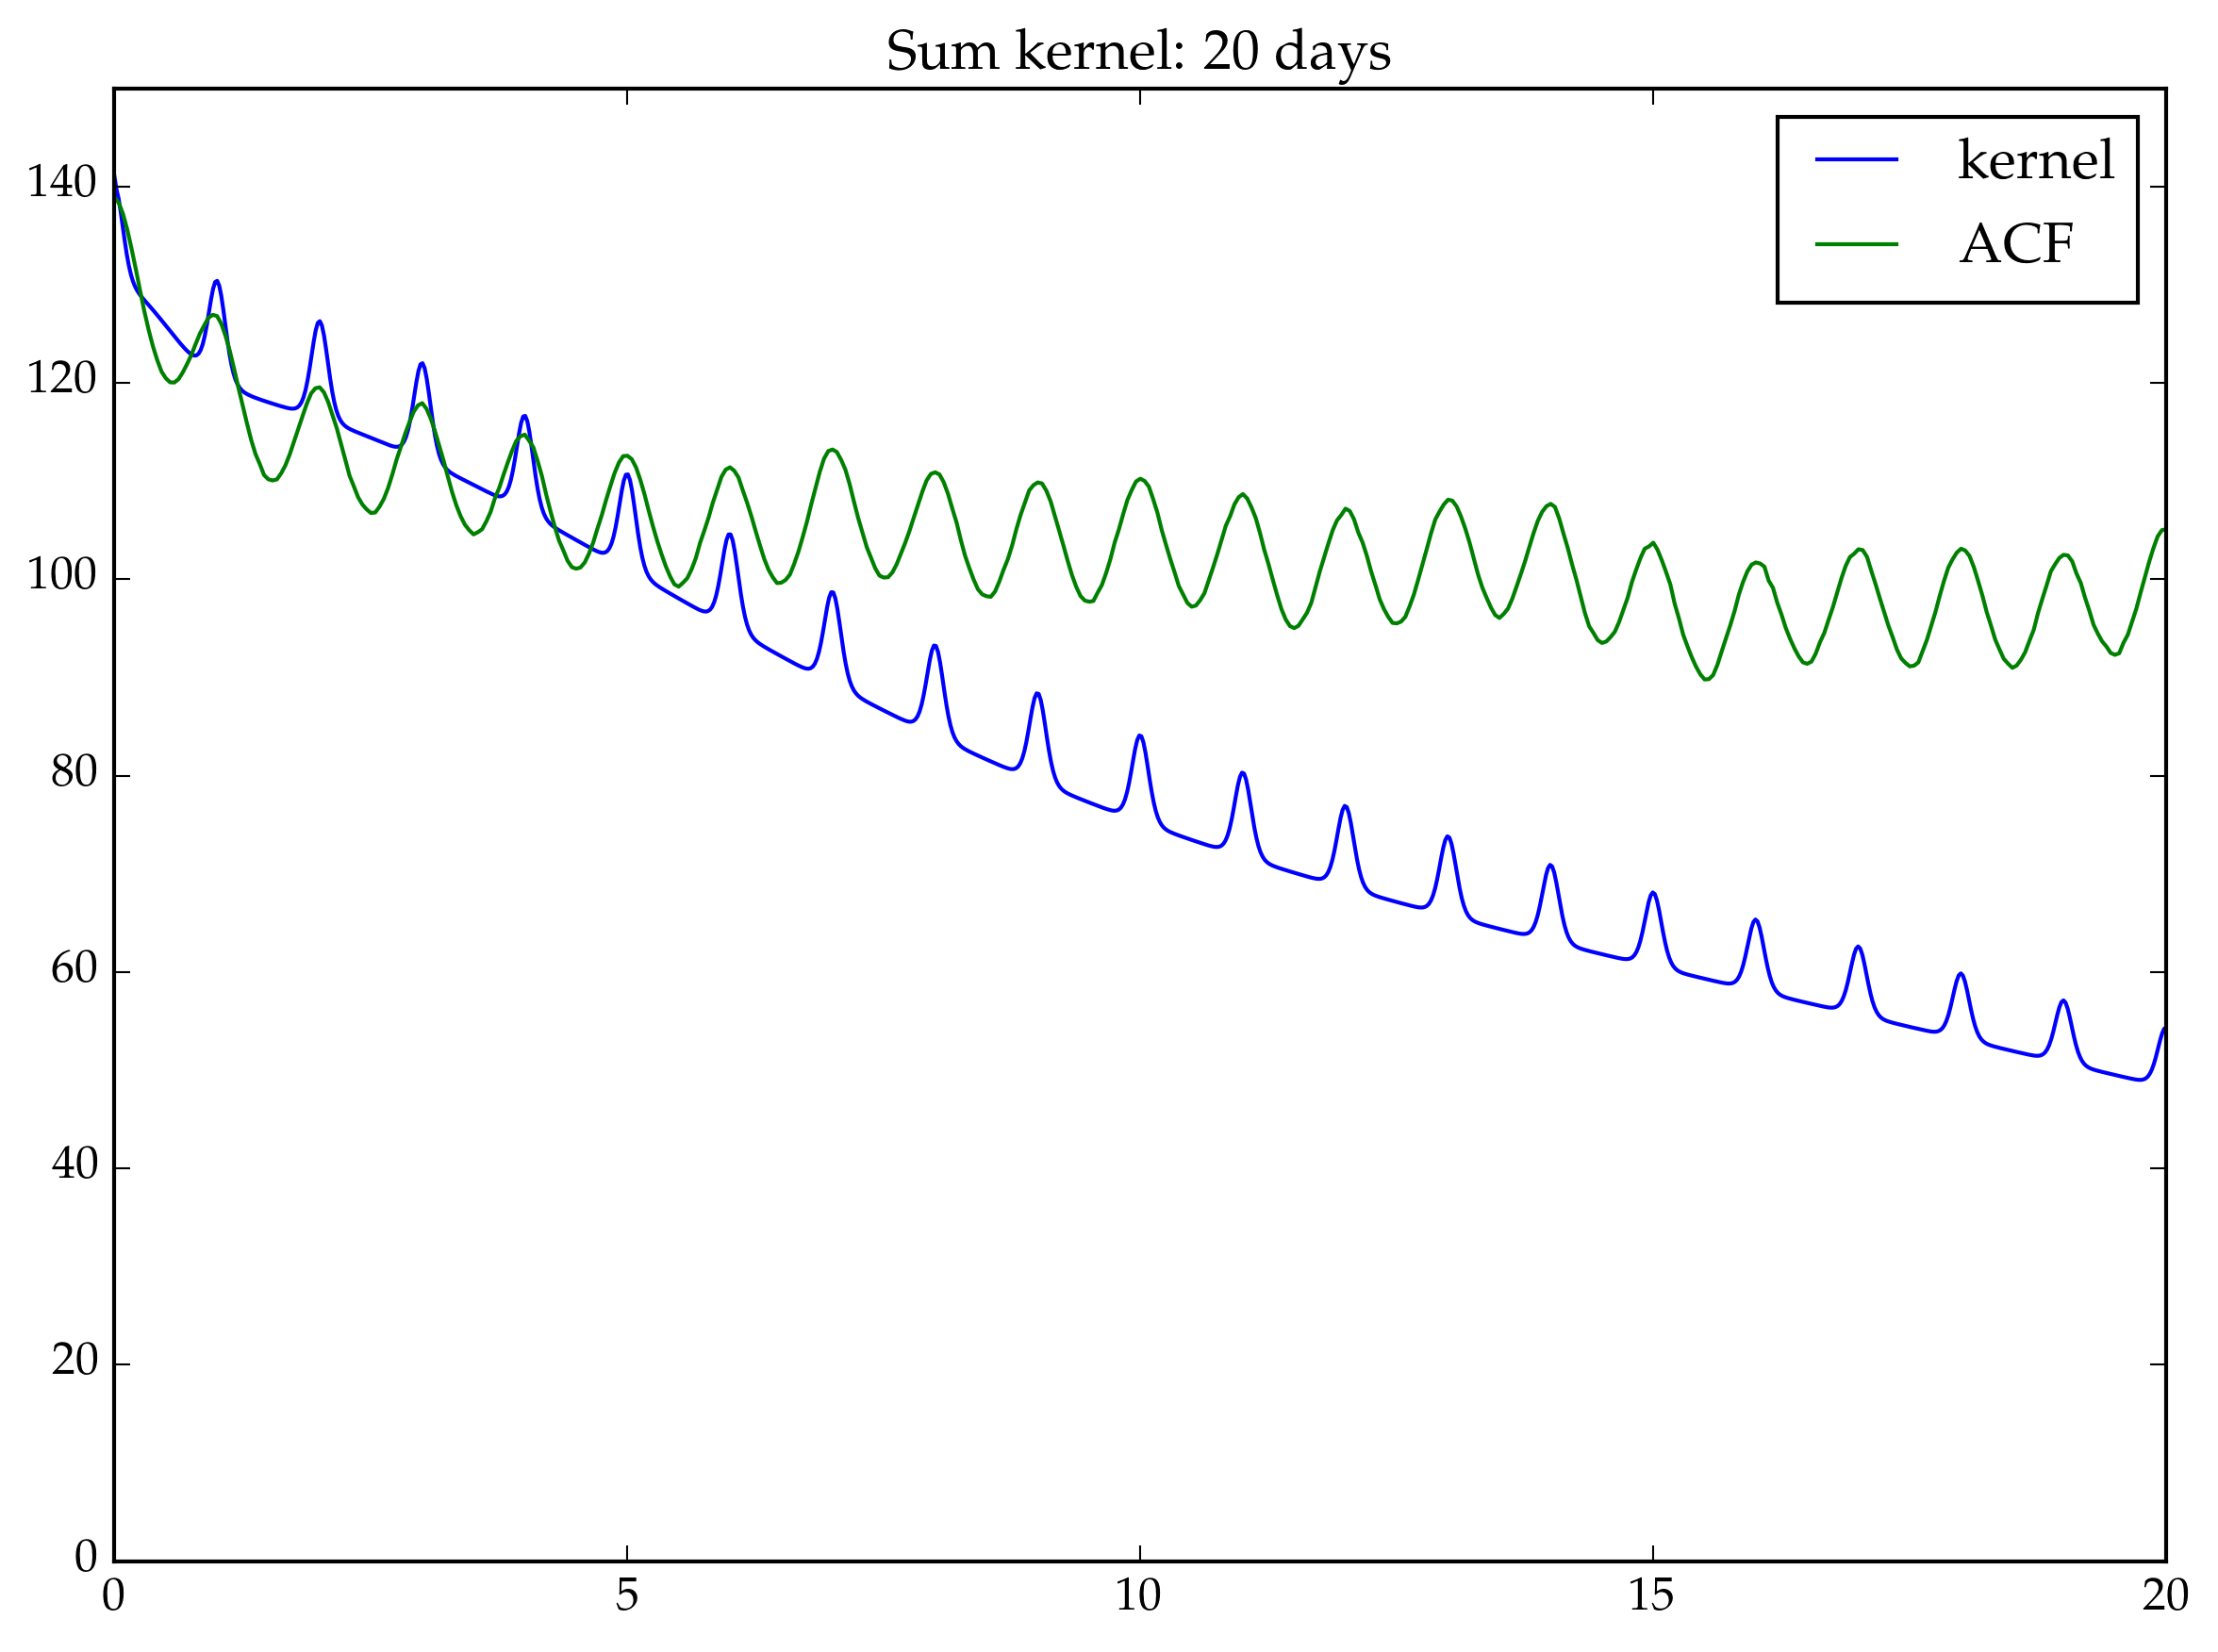

In [22]:
_days=20
_x = linspace(0,24*_days,1000)
plt.plot(_x/24, cov_to_0(_k, _x), label="kernel")
plt.plot(bins_days, station_ACF, label="ACF")
plt.xlim(0,_days)
plt.ylim(0,150)
plt.legend(loc="best")
plt.title(@sprintf("Sum kernel: %s days", _days))
;

## Optimization ACF

In [23]:
get_free_vars{K<:GP.Kernel}(k::K, fixed_vars::Vector{Int}) = filter(i -> i ∉ fixed_vars, 1:GP.num_params(k))

function gen_optim_target{K<:GP.Kernel}(k::K, fixed_vars::Vector{Int}, days::Int)
    free_vars = get_free_vars(k, fixed_vars)
    function f(x::Array)
        y = station_ACF[1:24*days]
        tt = bins_hours[1:24*days]
        pars = GP.get_params(k)
        pars[free_vars] = x
        GP.set_params!(k, pars)
        kx = cov_to_0(k, tt)
        loss = sum((y.-kx).^2)
    end
    function fg!(x::Array, storage::Array)
        y = station_ACF[1:24*days]
        tt = bins_hours[1:24*days]
        pars = GP.get_params(k)
        pars[free_vars] = x
        GP.set_params!(k, pars)
        kx = cov_to_0(k, tt)
#         kx = GP.crossKern(t_arr, zero_arr, k)
        loss = sum((y.-kx).^2)
        storage[:] = 0.0
        for (i,t) in enumerate(tt)
            storage[:] .+= GP.grad_kern(k, [0.0], [t])[free_vars] * (kx[i]-y[i])
        end
        storage[:] .*= 2
        return loss
    end
    function g!(x::Array, storage::Array)
        fg!(x,storage)
        return
    end
    return Optim.DifferentiableFunction(f, g!, fg!)
end
gen_optim_target(_k, [3], 30).f(GP.get_params(_k)[get_free_vars(_k, [3])])

1.1881248845987984e6

In [24]:
dldθ = zeros(Float64, GP.num_params(_k)-1)
println(gen_optim_target(_k, [3], 10).fg!(GP.get_params(_k)[get_free_vars(_k, [3])], dldθ))
dldθ

LoadError: LoadError: MethodError: no method matching grad_kern(::GaussianProcesses.ProdKernel, ::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  grad_kern(!Matched::GaussianProcesses.SumKernel, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/sum_kernel.jl:90
  grad_kern(!Matched::GaussianProcesses.SEArd, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/se_ard.jl:33
  grad_kern(!Matched::GaussianProcesses.Isotropic, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/stationary.jl:100
while loading In[24], in expression starting on line 2

Check derivatives are correct:

In [25]:
_x = GP.get_params(_k)[get_free_vars(_k, [3])]
_x[6] += 1/dldθ[6]/10
gen_optim_target(_k, [3], 10).f(_x)

Inf

In [26]:
k0 = GP.Noise(log(√(station_ACF[1]-station_ACF[2])))
k1 = GP.Periodic(log(0.5), log(√(10.0)), log(24.0))
k2 = GP.RQIso(log(0.1*24), log(√10.0), 3.0) # short term
k3 = GP.RQIso(log(3.0*24), log(√20.0), 3.0)
k4 = GP.RQIso(log(10.0*24), log(√20.0), 3.0)
k5 = GP.SE(log(200.0*24), log(√80.0))

_k=k0+k1+k2+k3+k4+k5
_n = GP.num_params(_k)
Optim.optimize(gen_optim_target(_k, [1,4,14], 3),  
    GP.get_params(_k)[get_free_vars(_k, [1,4,14])], Optim.LBFGS())
Optim.optimize(gen_optim_target(_k, [4,14], 3),  
    GP.get_params(_k)[get_free_vars(_k, [4,14])], Optim.LBFGS())    
Optim.optimize(gen_optim_target(_k, [4,5,6,7,14], 10), 
    GP.get_params(_k)[get_free_vars(_k, [4,5,6,7,14])], Optim.LBFGS())
# Optim.optimize(gen_optim_target(_k, [4,5,7,8,9,10,14], 20), 
#     GP.get_params(_k)[get_free_vars(_k, [4,5,7,8,9,10,14])], Optim.LBFGS())

LoadError: LoadError: MethodError: no method matching grad_kern(::GaussianProcesses.Noise, ::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  grad_kern(!Matched::GaussianProcesses.SumKernel, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/sum_kernel.jl:90
  grad_kern(!Matched::GaussianProcesses.SEArd, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/se_ard.jl:33
  grad_kern(!Matched::GaussianProcesses.Isotropic, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/stationary.jl:100
while loading In[26], in expression starting on line 10

In [27]:
_k

Type: GaussianProcesses.SumKernel
  Type: GaussianProcesses.Noise, Params: [-0.294227]
  Type: GaussianProcesses.Periodic, Params: [-0.693147,1.15129,3.17805]
  Type: GaussianProcesses.RQIso, Params: [0.875469,1.15129,3.0]
  Type: GaussianProcesses.RQIso, Params: [4.27667,1.49787,3.0]
  Type: GaussianProcesses.RQIso, Params: [5.48064,1.49787,3.0]
  Type: GaussianProcesses.SEIso, Params: [8.47637,2.19101]


In [28]:
sqrt(k2.ℓ2)/24,sqrt(k3.ℓ2)/24,sqrt(k4.ℓ2)/24,sqrt(k5.ℓ2)/24

(0.10000000000000002,3.0,9.999999999999998,200.00000000000003)

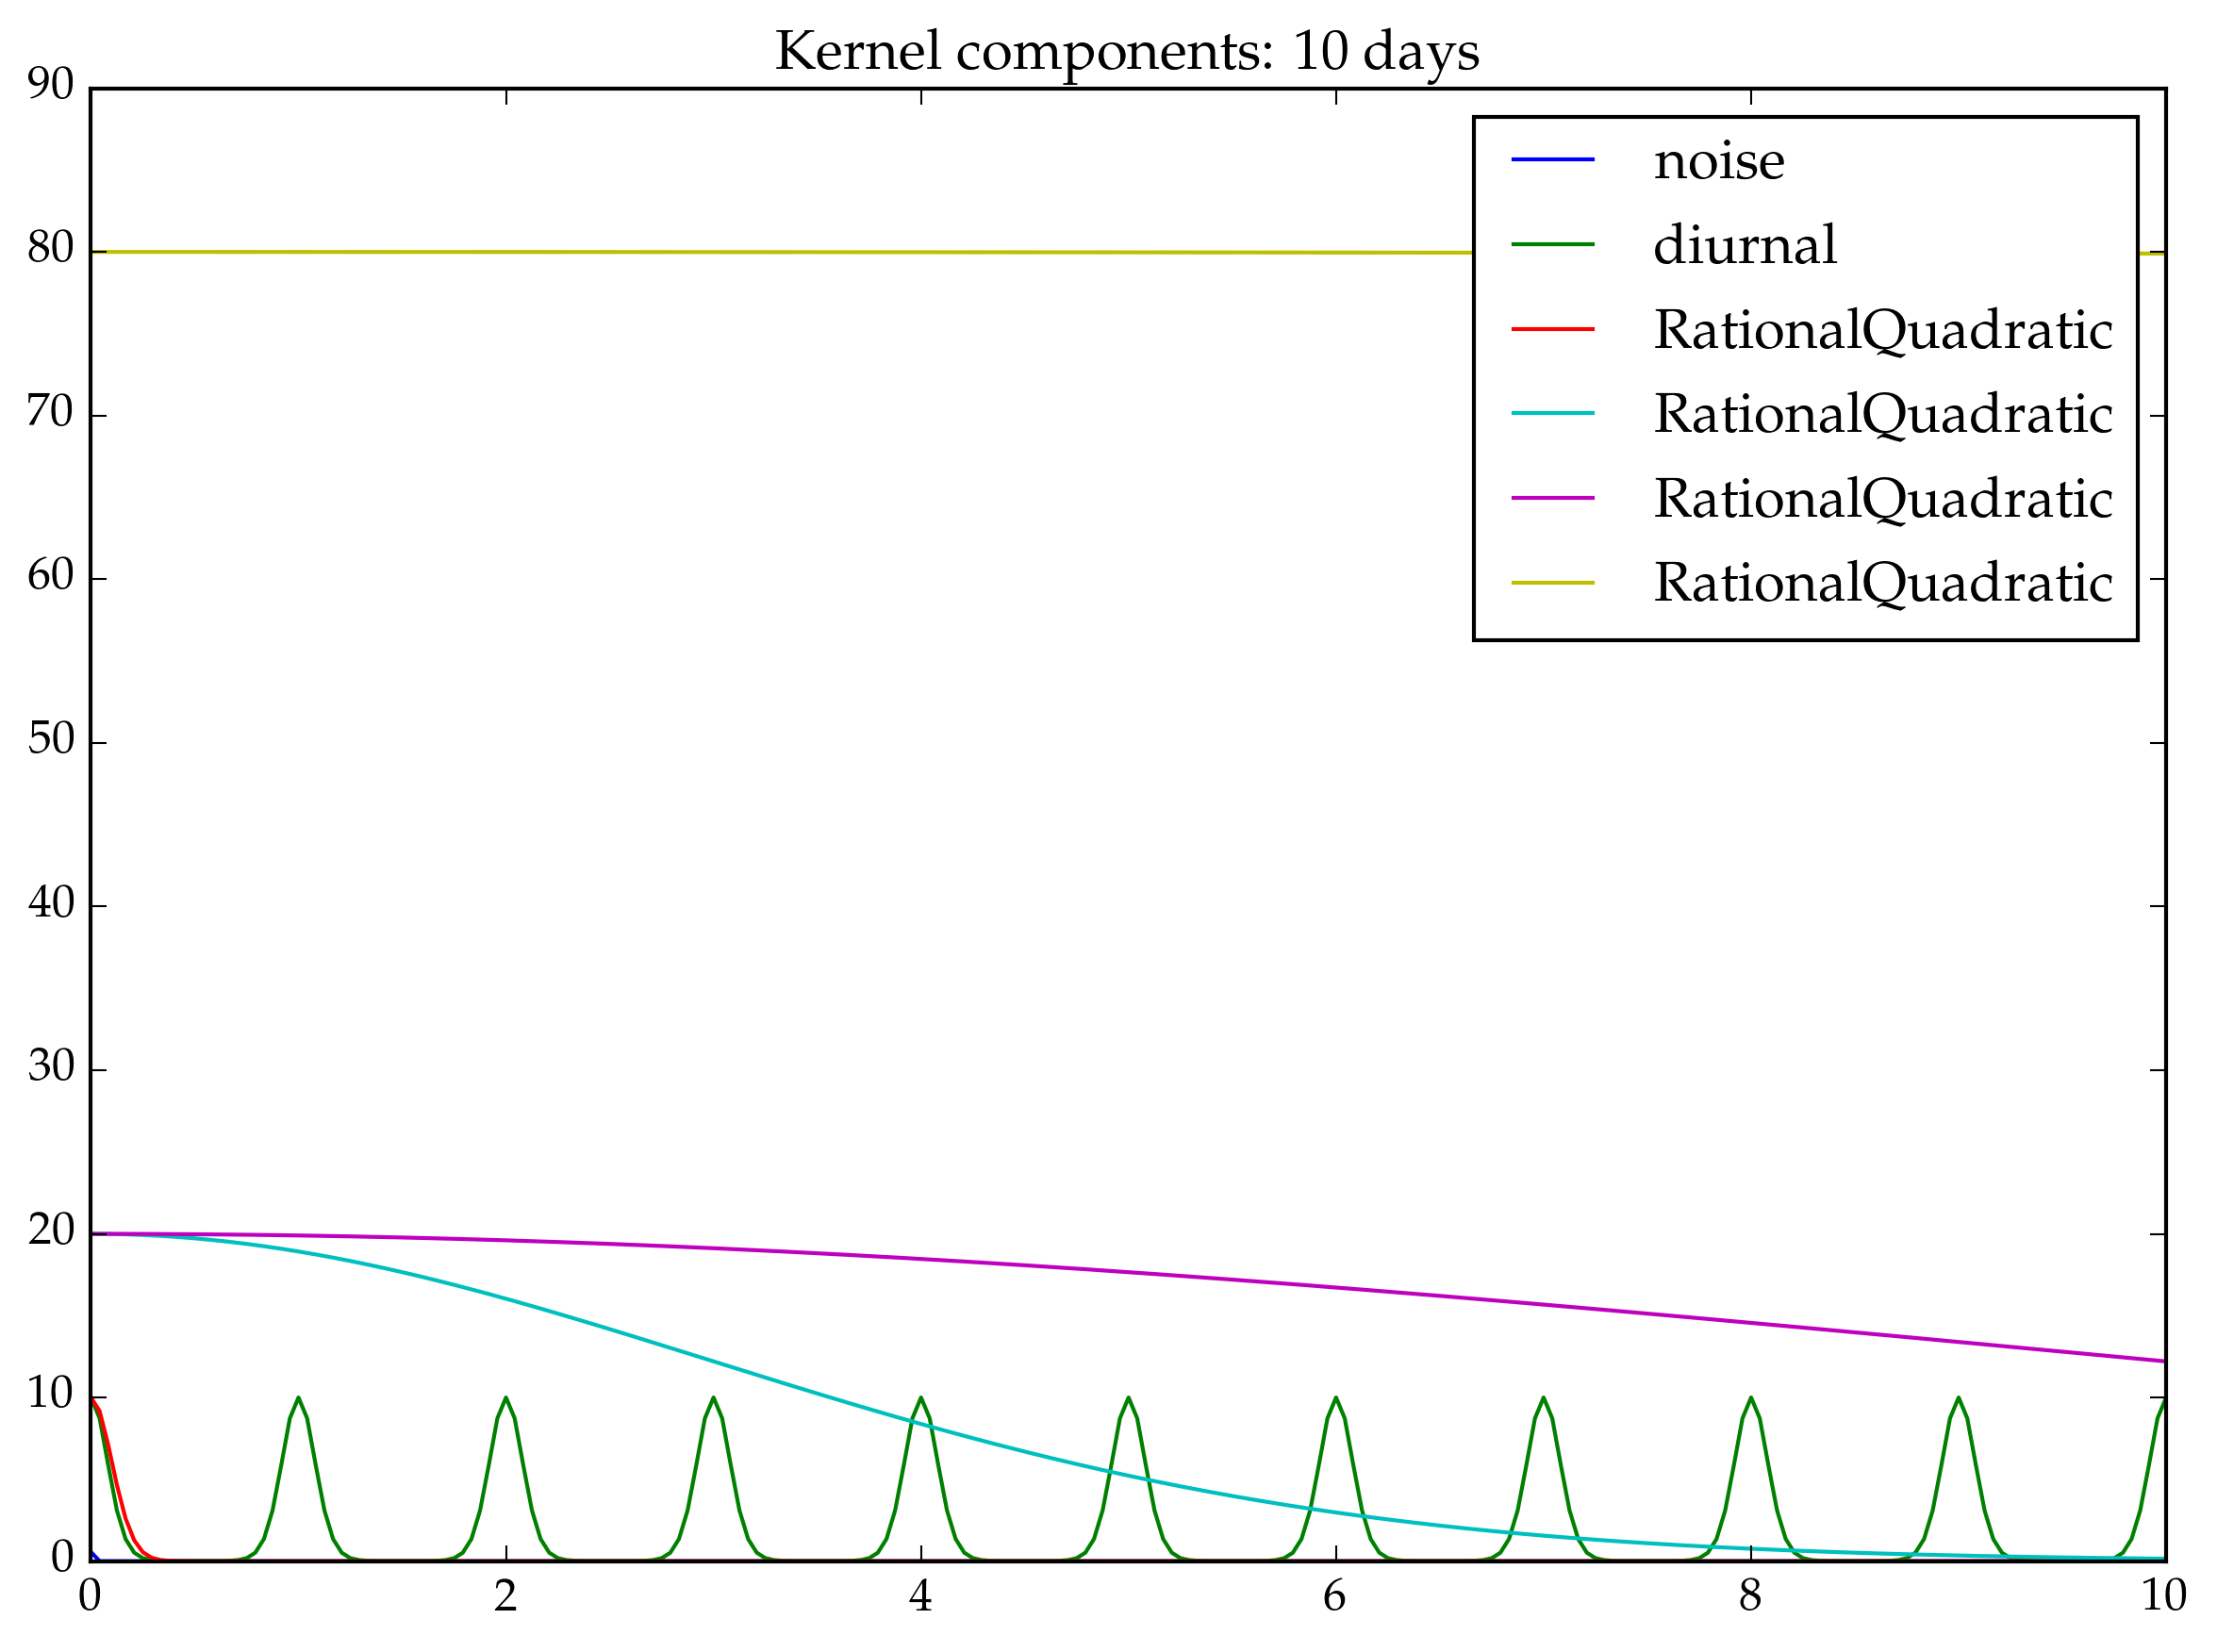

In [29]:
_ndays = 10
_x = 0:24.0*_ndays
plt.plot(_x/24, cov_to_0(k0, _x), label="noise")
plt.plot(_x/24, cov_to_0(k1, _x), label="diurnal")
plt.plot(_x/24, cov_to_0(k2, _x), label="RationalQuadratic")
plt.plot(_x/24, cov_to_0(k3, _x), label="RationalQuadratic")
plt.plot(_x/24, cov_to_0(k4, _x), label="RationalQuadratic")
plt.plot(_x/24, cov_to_0(k5, _x), label="RationalQuadratic")
plt.xlim(0,_ndays)
plt.legend(loc="upper right")
plt.title(@sprintf("Kernel components: %s days", _ndays))
;

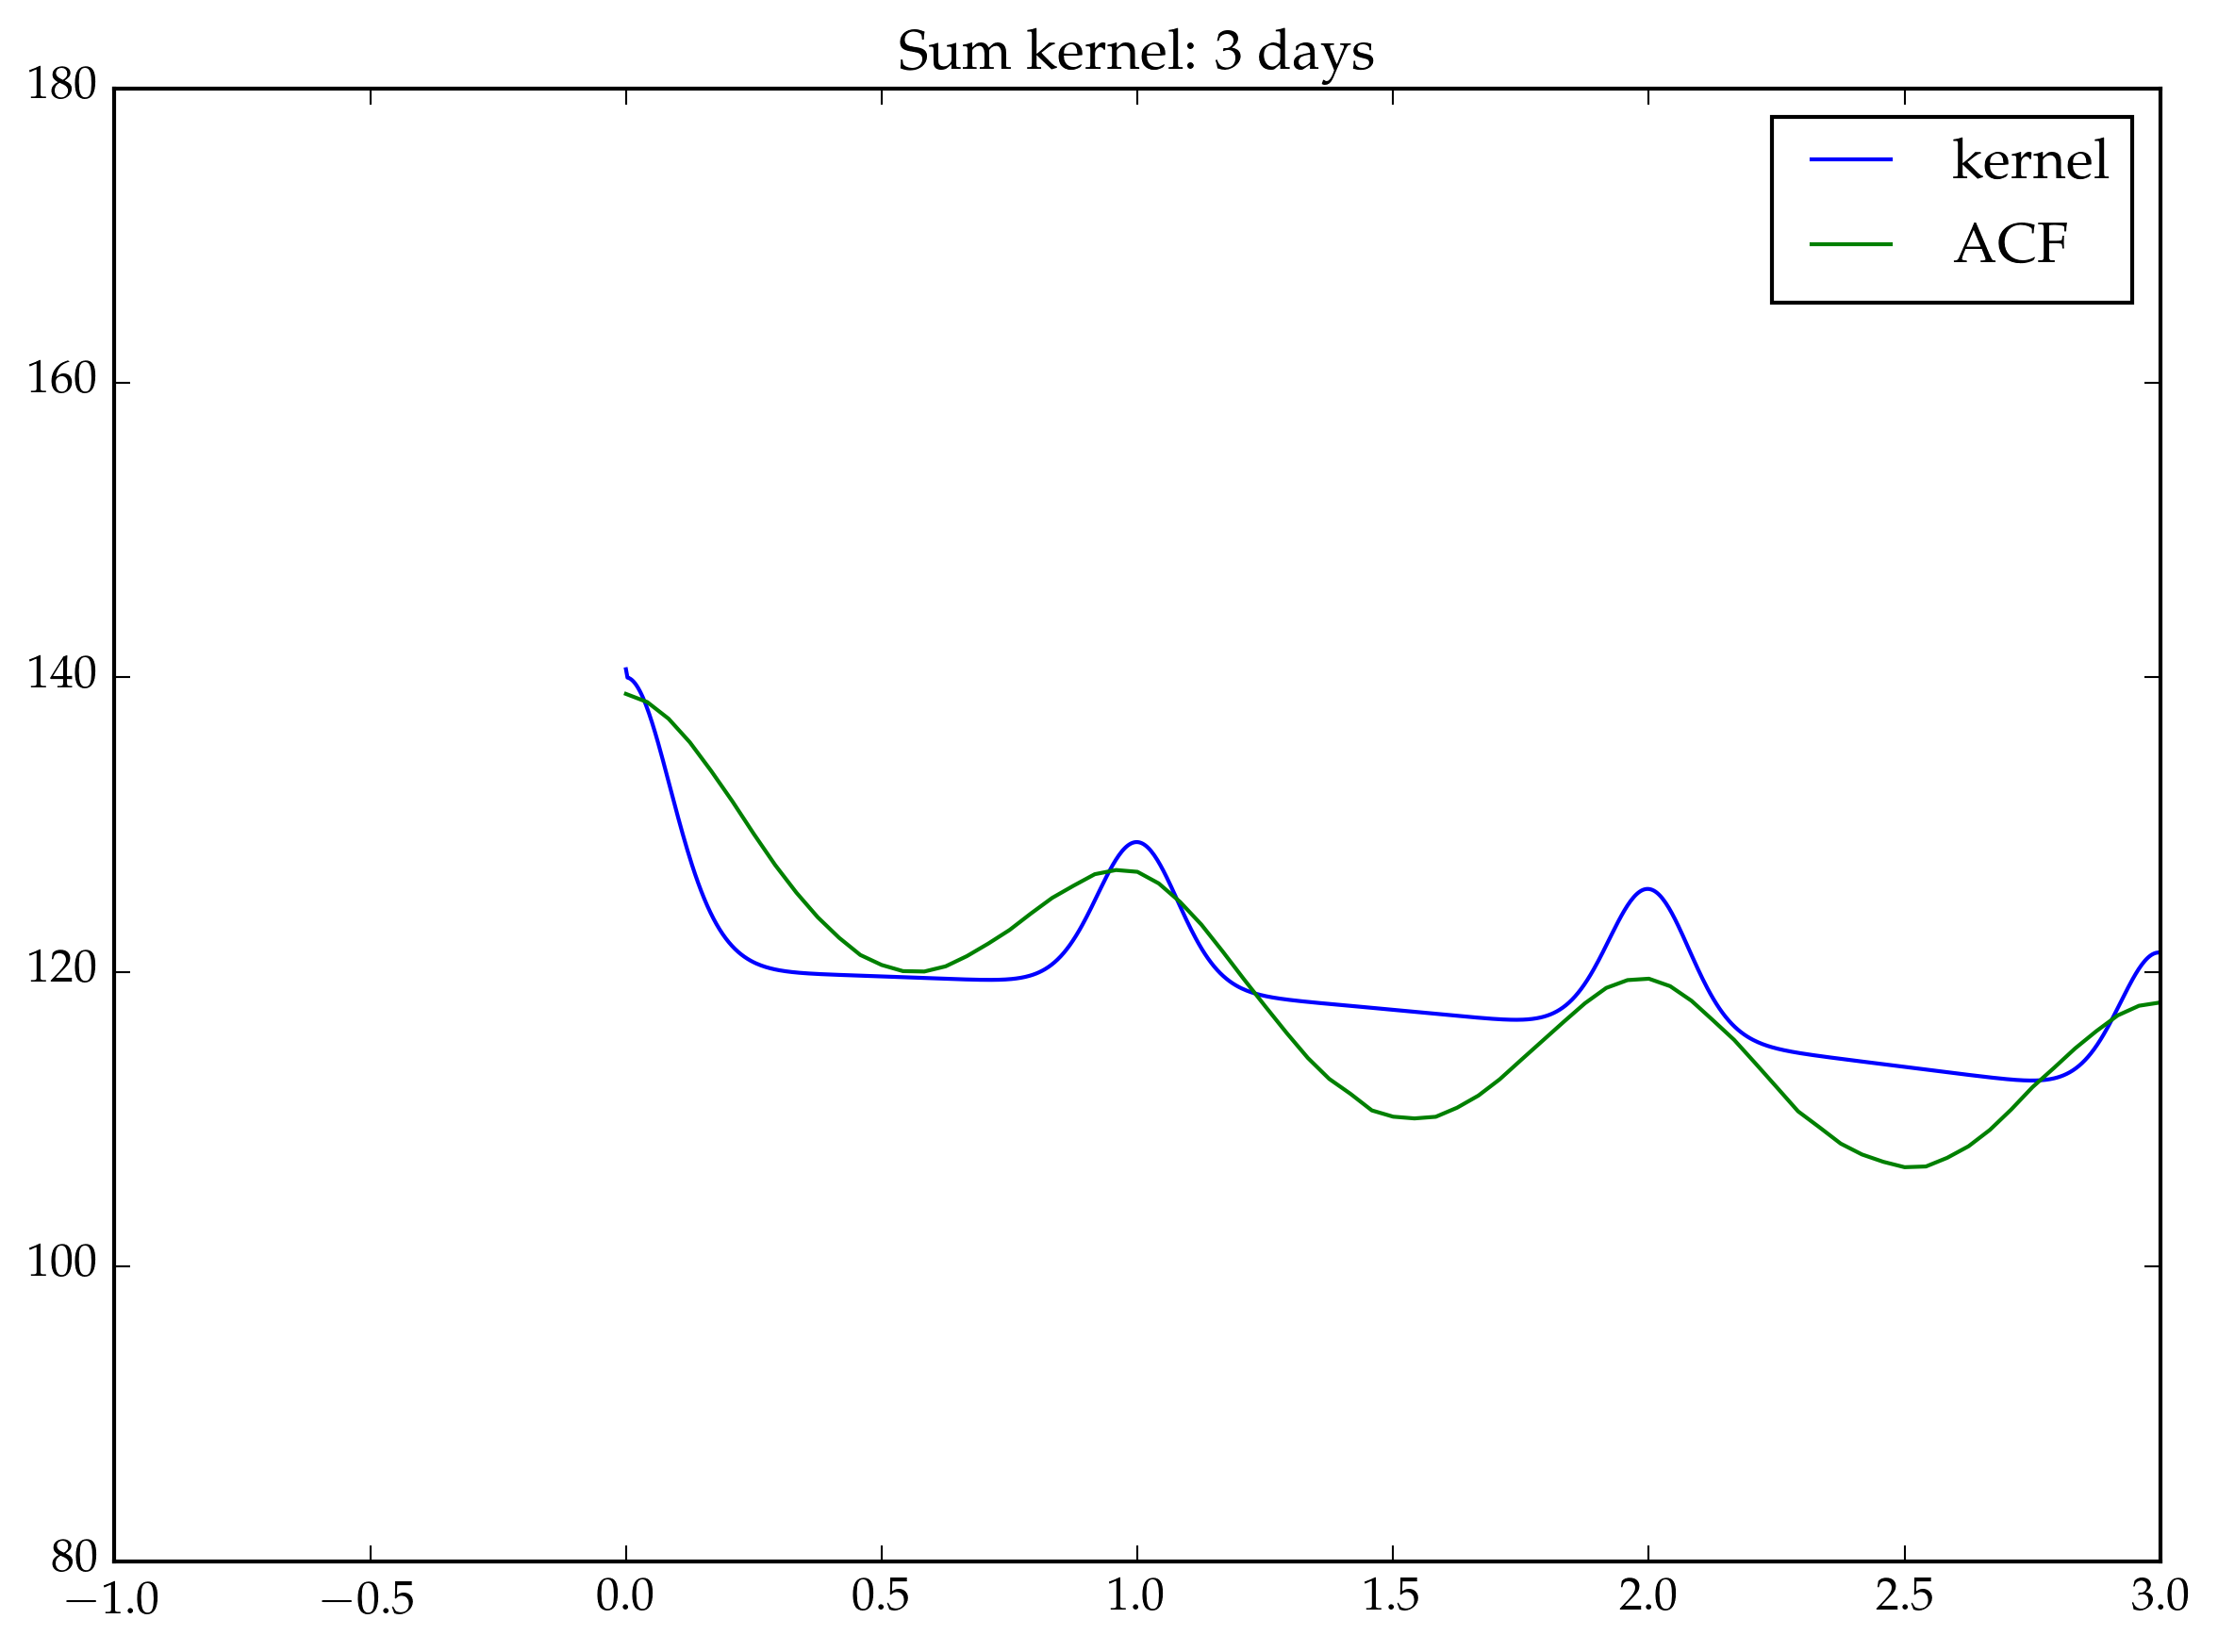

In [30]:
_days=3
_x = linspace(0,24*_days,1000)
plt.plot(_x/24, cov_to_0(_k, _x), label="kernel")
plt.plot(bins_days, station_ACF, label="ACF")
plt.xlim(-1,_days)
plt.ylim(80,180)
plt.legend(loc="best")
plt.title(@sprintf("Sum kernel: %s days", _days))
;

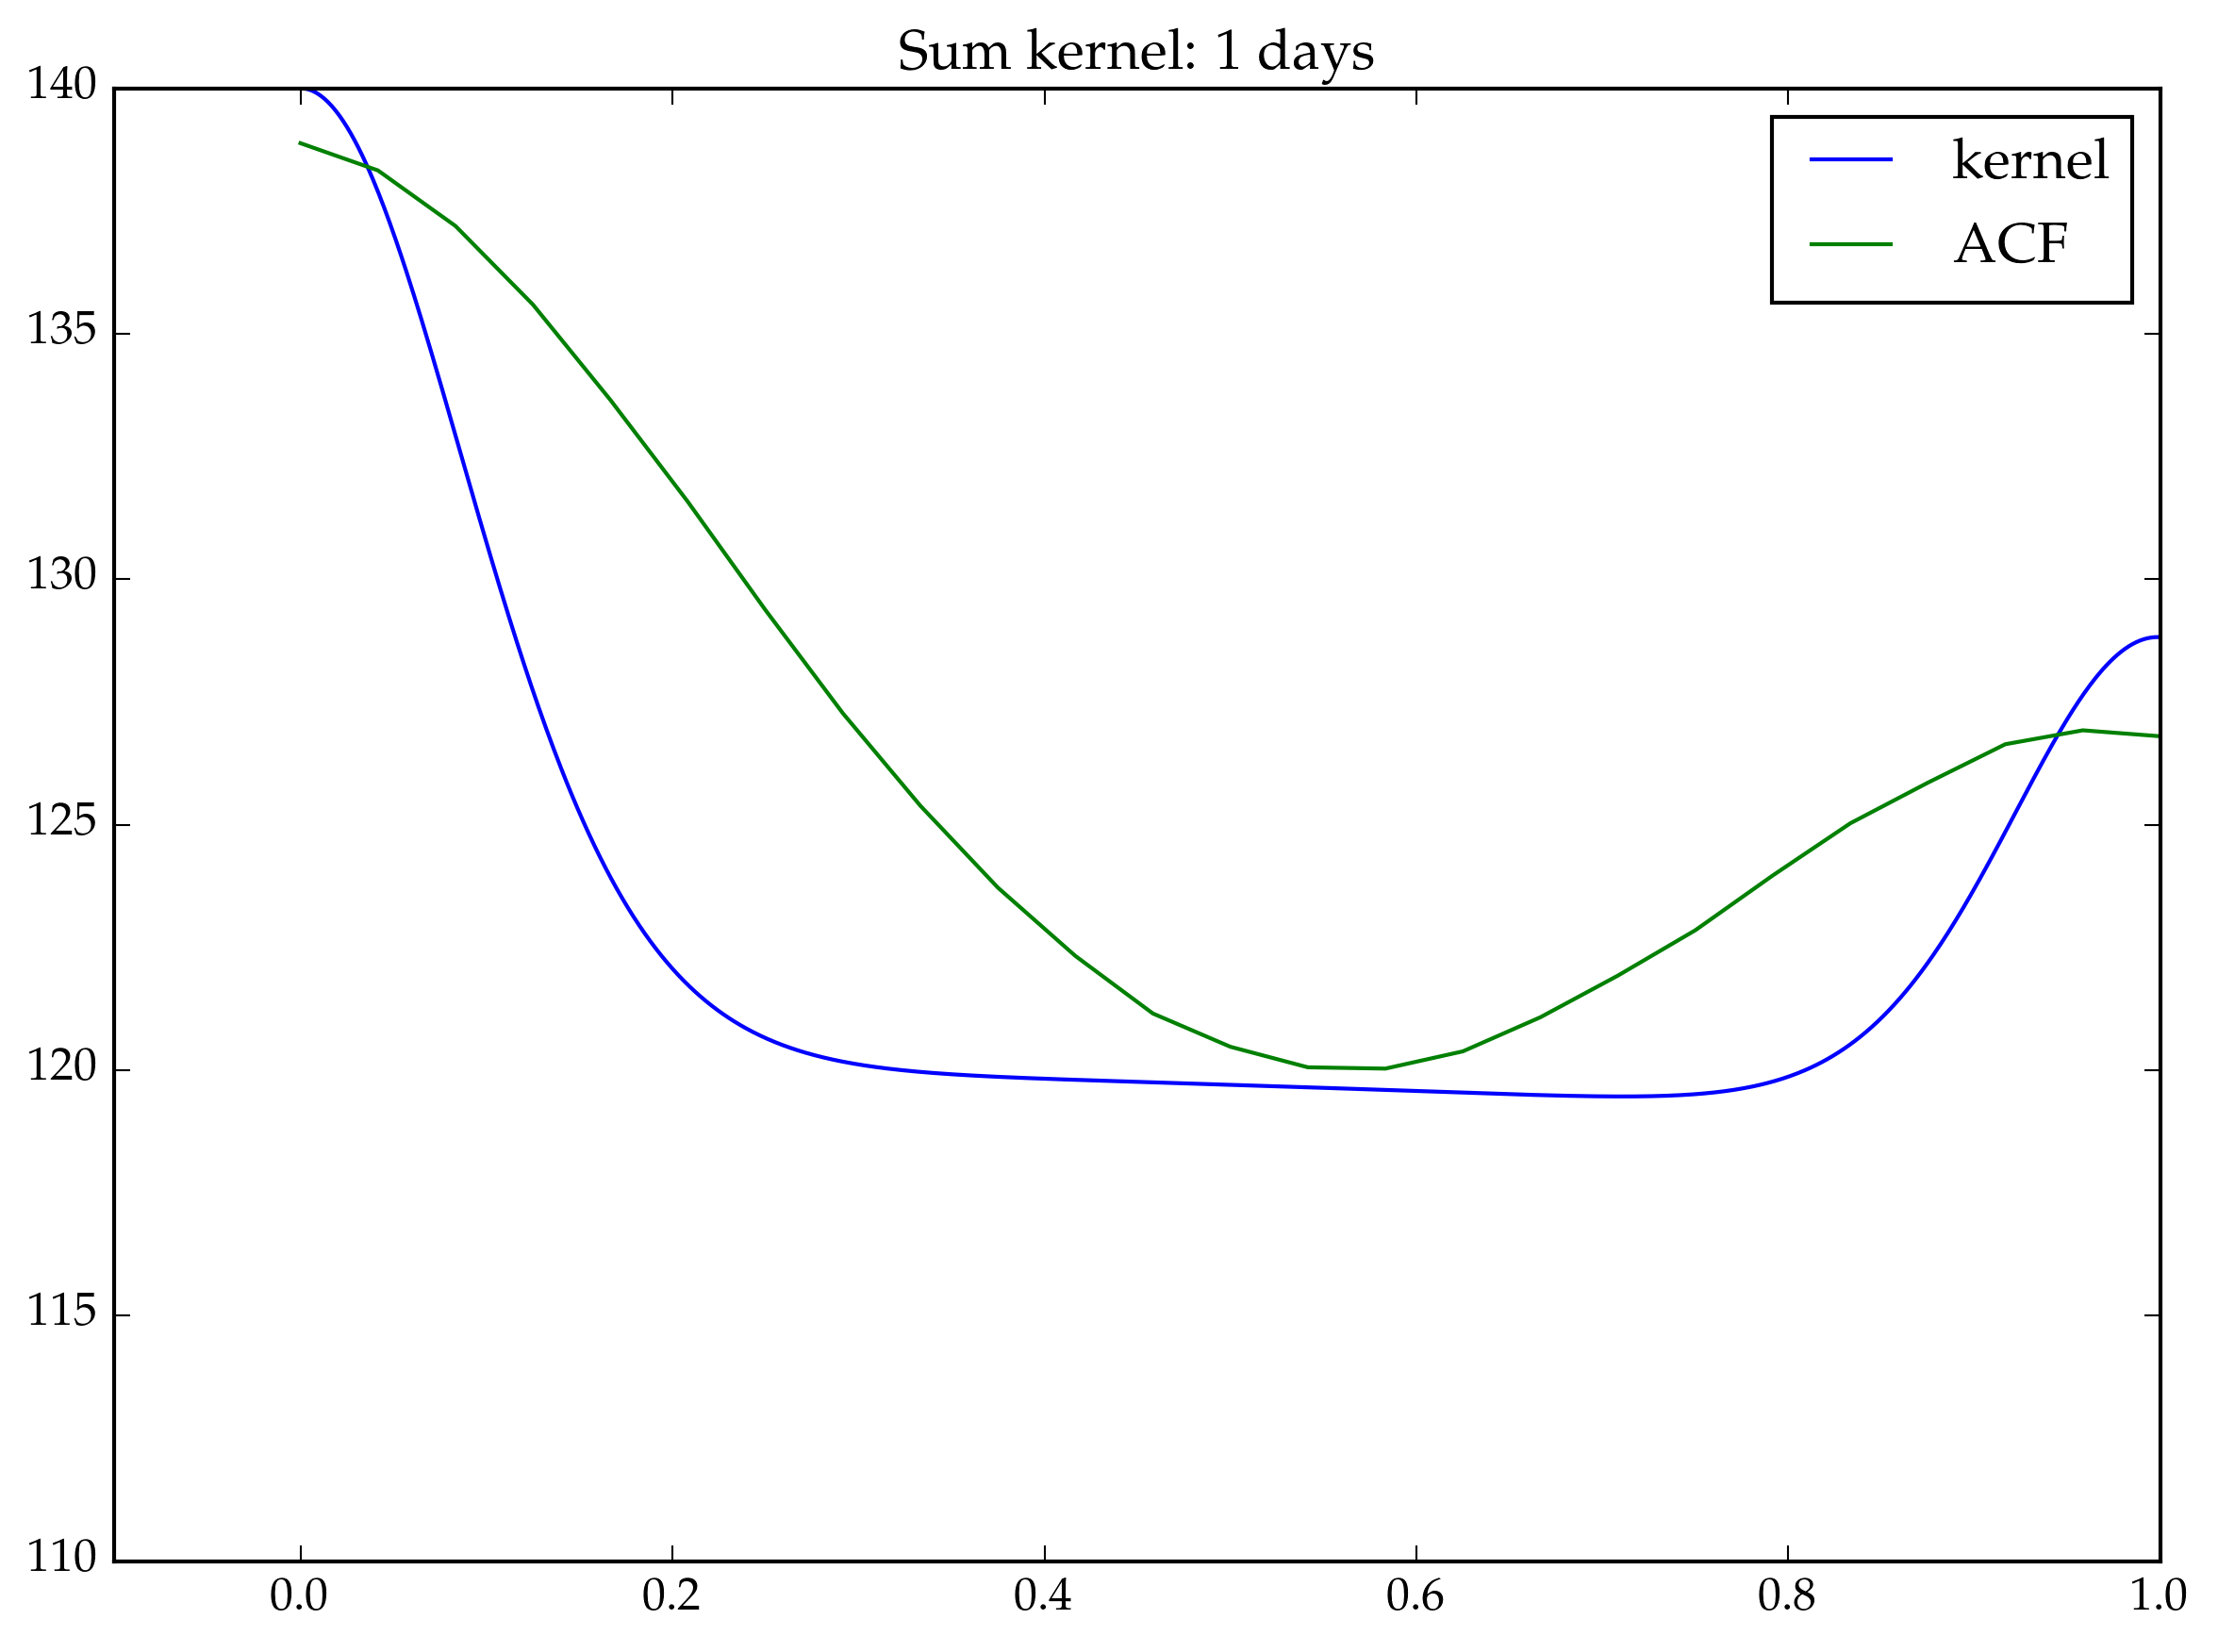

In [31]:
_days=1
_x = linspace(0,24*_days,1000)
plt.plot(_x/24, cov_to_0(_k, _x), label="kernel")
plt.plot(bins_days, station_ACF, label="ACF")
plt.xlim(-0.1,_days)
plt.ylim(110,140)
plt.legend(loc="best")
plt.title(@sprintf("Sum kernel: %s days", _days))
;

In [32]:
Optim.optimize(gen_optim_target(_k, [3], 50), GP.get_params(_k)[get_free_vars(_k, [3])], Optim.LBFGS())

LoadError: LoadError: MethodError: no method matching grad_kern(::GaussianProcesses.Noise, ::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  grad_kern(!Matched::GaussianProcesses.SumKernel, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/sum_kernel.jl:90
  grad_kern(!Matched::GaussianProcesses.SEArd, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/se_ard.jl:33
  grad_kern(!Matched::GaussianProcesses.Isotropic, ::Array{Float64,1}, ::Array{Float64,1}) at /Users/imolk/.julia/v0.5/GaussianProcesses/src/kernels/stationary.jl:100
while loading In[32], in expression starting on line 1

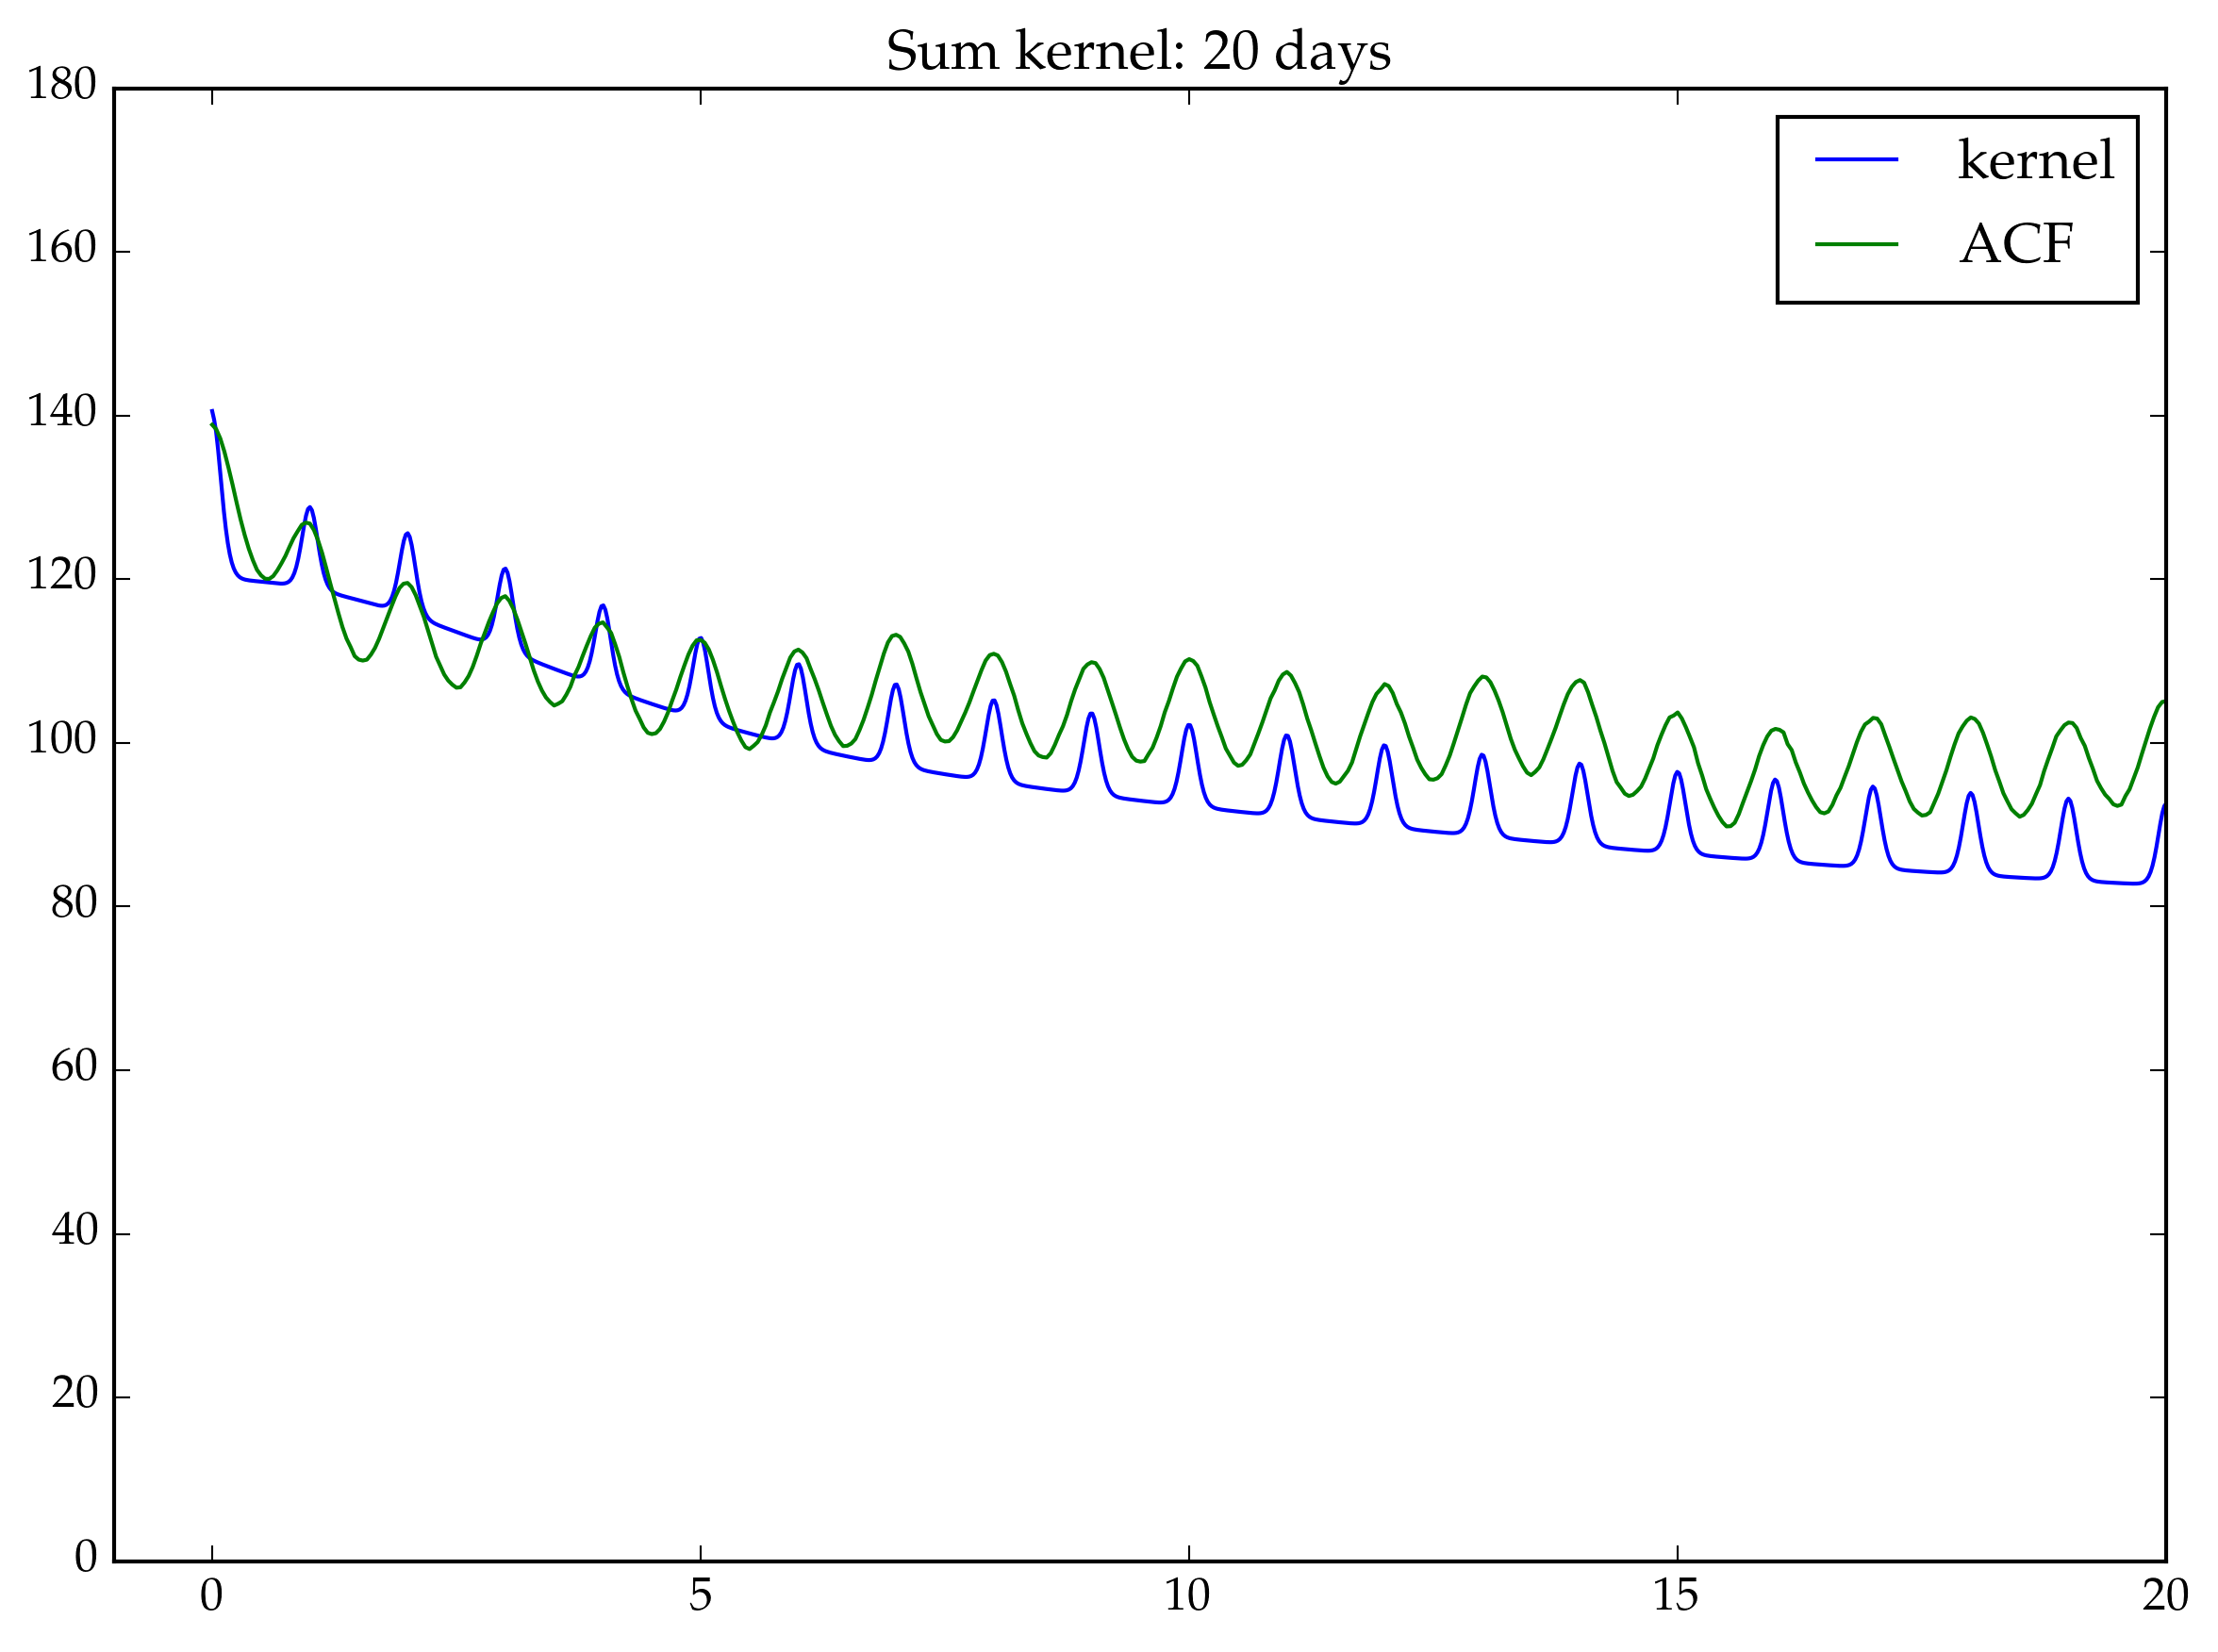

In [33]:
_days=20
_x = linspace(0,24*_days,1000)
plt.plot(_x/24, cov_to_0(_k, _x), label="kernel")
plt.plot(bins_days, station_ACF, label="ACF")
plt.xlim(-1,_days)
plt.ylim(0,180)
plt.legend(loc="best")
plt.title(@sprintf("Sum kernel: %s days", _days))
;

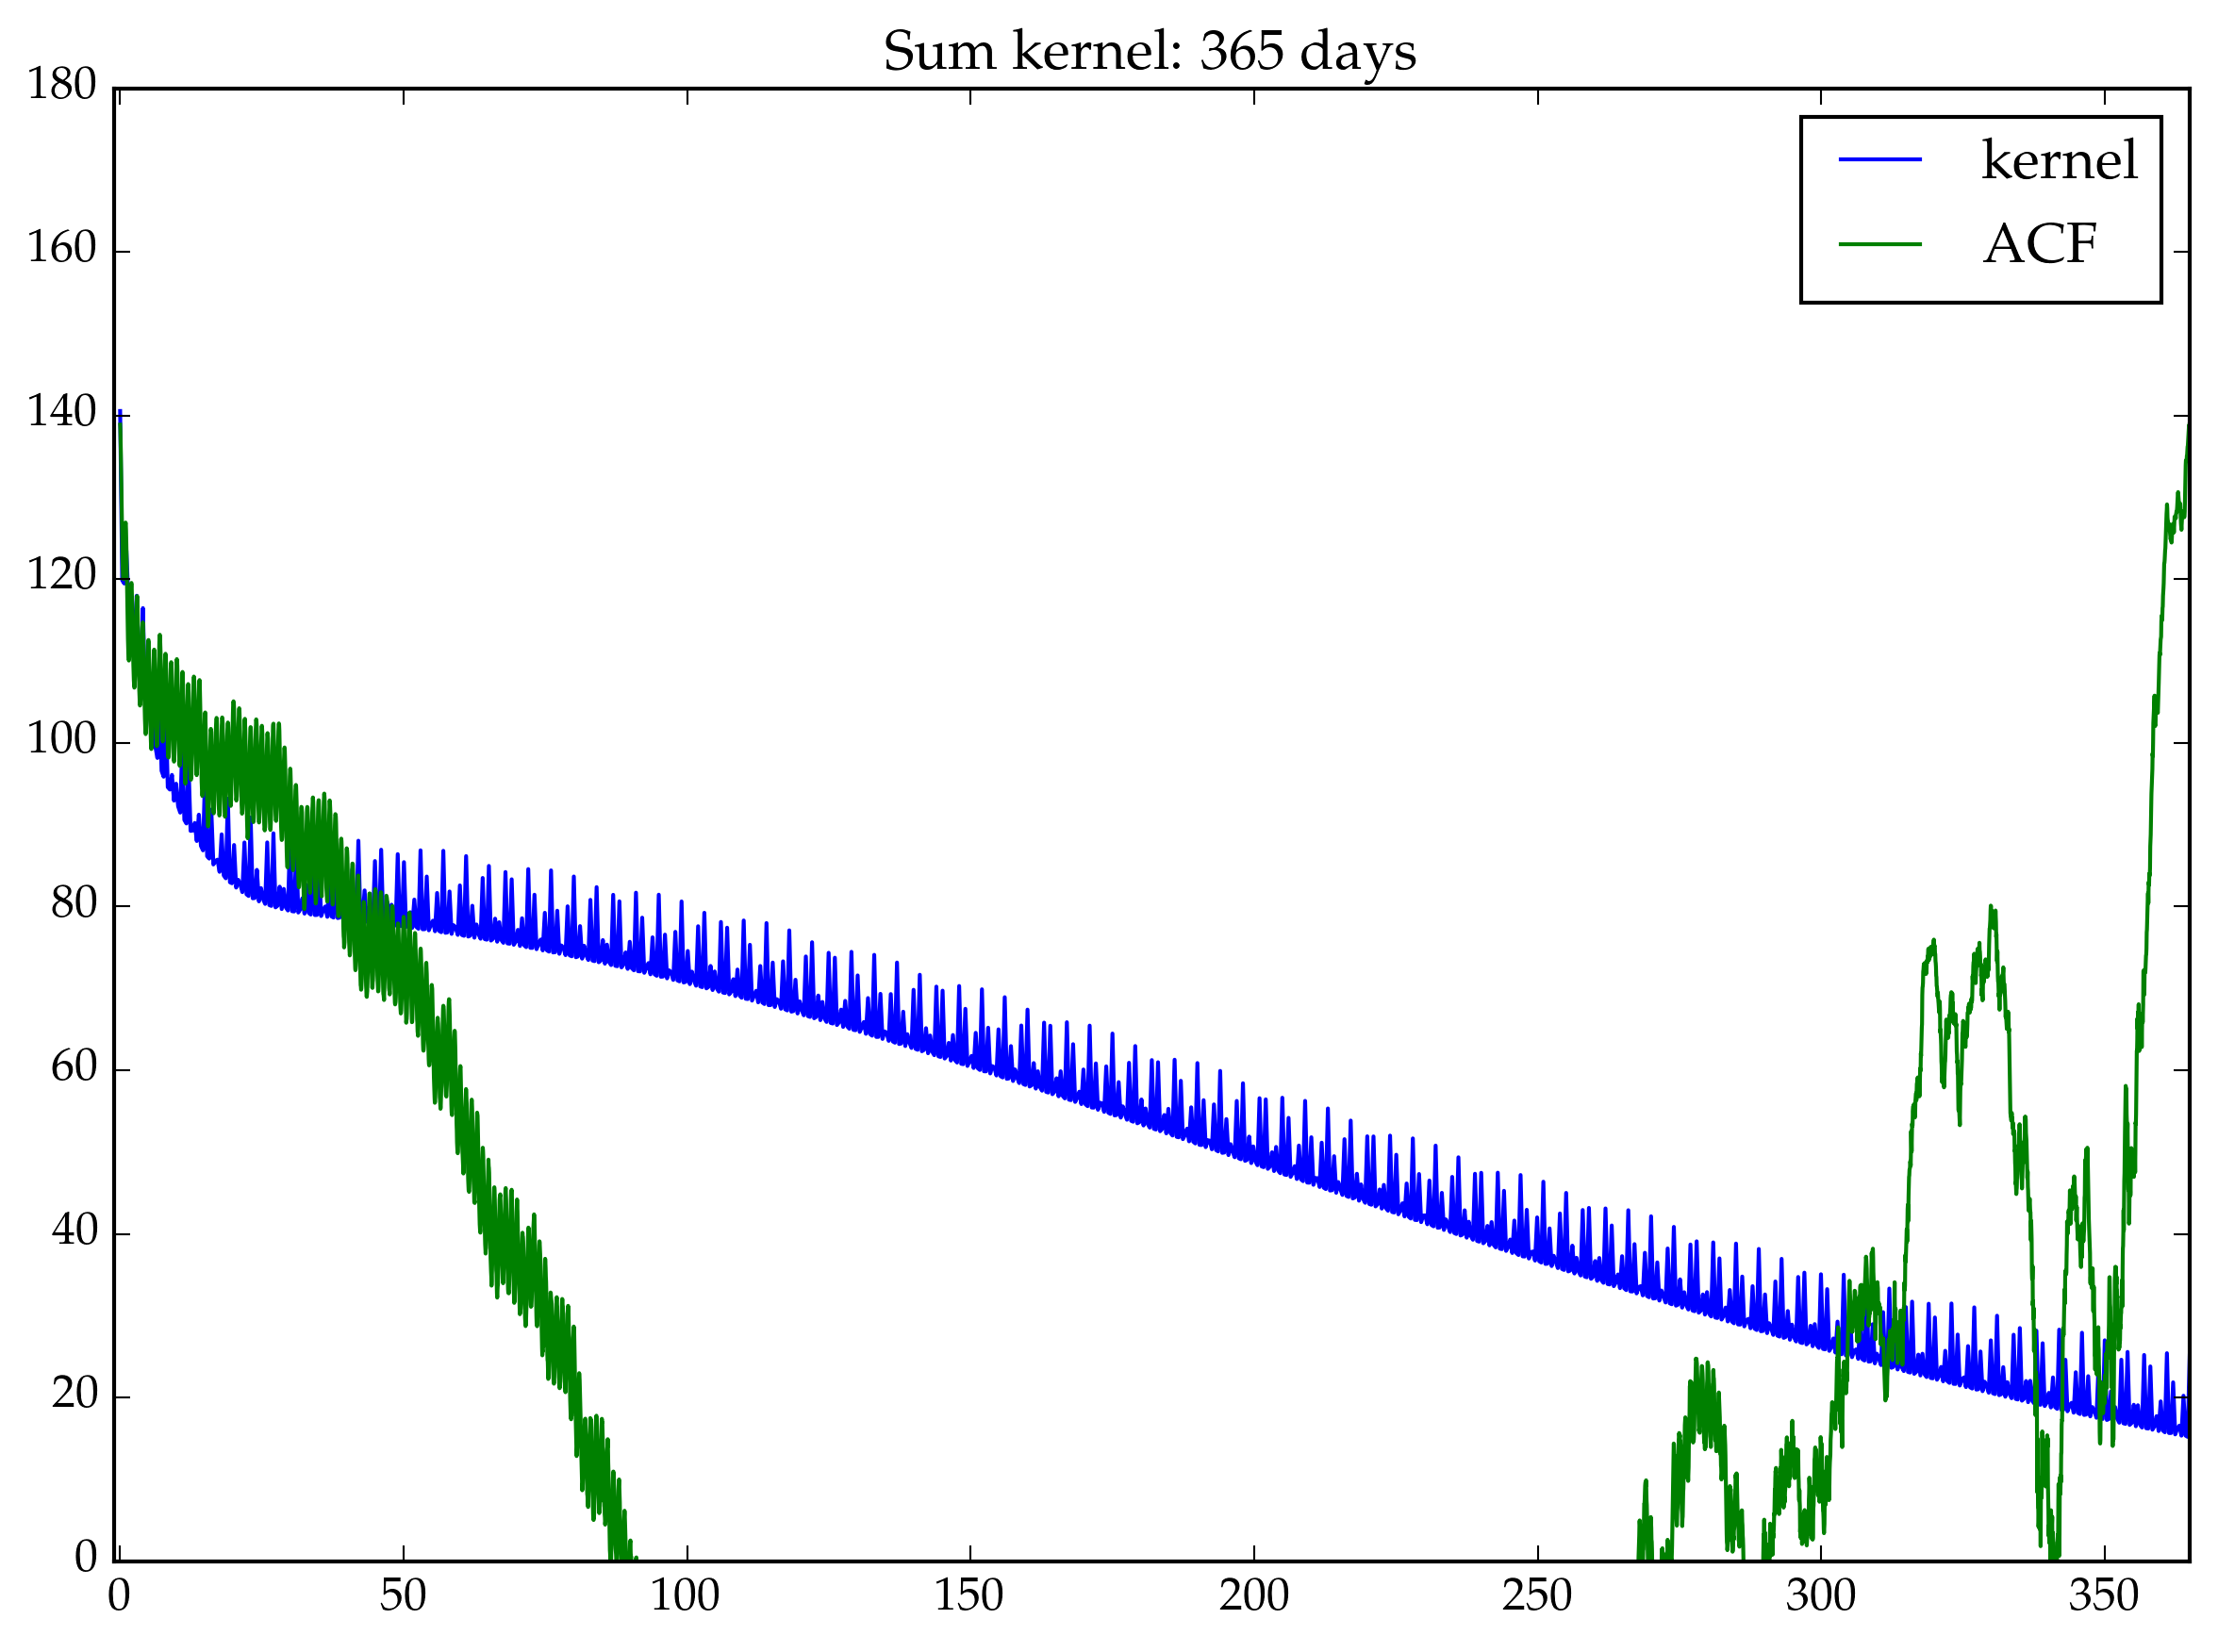

In [34]:
_days=365
_x = linspace(0,24*_days,1000)
plt.plot(_x/24, cov_to_0(_k, _x), label="kernel")
plt.plot(bins_days, station_ACF, label="ACF")
plt.xlim(-1,_days)
plt.ylim(0,180)
plt.legend(loc="best")
plt.title(@sprintf("Sum kernel: %s days", _days))
;

In [35]:
print(GP.get_params(_k))

[-0.294227,-0.693147,1.15129,3.17805,0.875469,1.15129,3.0,4.27667,1.49787,3.0,5.48064,1.49787,3.0,8.47637,2.19101]

# Fitting GP

In [36]:
ms_per_hour = 1e3*3600
ts_vec = convert(Vector{Float64}, station_ts.-station_ts[1]) / ms_per_hour
ts_arr = reshape(ts_vec, (1,length(ts_vec)))
;

In [37]:
_k_nonoise = (k1+k2+k3+k4+k5)
_k_nonoise

Type: GaussianProcesses.SumKernel
  Type: GaussianProcesses.Periodic, Params: [-0.693147,1.15129,3.17805]
  Type: GaussianProcesses.RQIso, Params: [0.875469,1.15129,3.0]
  Type: GaussianProcesses.RQIso, Params: [4.27667,1.49787,3.0]
  Type: GaussianProcesses.RQIso, Params: [5.48064,1.49787,3.0]
  Type: GaussianProcesses.SEIso, Params: [8.47637,2.19101]


In [38]:
k0
_lognoise = 2k0.lσ

LoadError: LoadError: type Noise has no field lσ
while loading In[38], in expression starting on line 2

In [39]:
mean_func = GP.MeanConst(mean(station_data[:temp]))
temp_vec = convert(Vector{Float64}, station_data[:temp])
@time gp_fit = GP.GP(ts_arr, temp_vec, mean_func, _k_nonoise, -9.0);

LoadError: LoadError: Base.LinAlg.PosDefException(5188)
while loading In[39], in expression starting on line 184

In [40]:
function plot1D(gp::GP.GP; clim::Tuple{Float64, Float64}=(minimum(gp.x), maximum(gp.x)), CI::Float64=1.96, res::Int=1000)

        sx = (clim[2]-clim[1])/(res-1)
        x=collect(clim[1]:sx:clim[2])
        mu, Sigma = GP.predict(gp, x)
        conf = CI*sqrt(Sigma)
        u = mu + conf
        l = mu - conf
        
        plt.plt[:interactive](true)
        plt.title("GP")
        plt.plt[:interactive](false)
        plt.plot(x, mu, color="blue")
        plt.fill_between(x, u, l,
            alpha=0.3, edgecolor="none", facecolor="blue")
        plt.plt[:interactive](true)    
end

plot1D (generic function with 1 method)

In [41]:
@time GP.predict(gp_fit, collect(linspace(0,100,10)));

LoadError: LoadError: UndefVarError: gp_fit not defined
while loading In[41], in expression starting on line 184

In [42]:
_ndays=3
plt.plot(ts_vec, temp_vec, ".-", color="#555555", label="data")
@time plot1D(gp_fit, clim=(0.0,24.0*_ndays), res=100)
plt.xlim(0,24*_ndays)
;

LoadError: LoadError: UndefVarError: gp_fit not defined
while loading In[42], in expression starting on line 184